# Brève introduction

Dans le cadre de l'objectif visant à construire un monde libéré de la faim, une des équipes de la 'Food and Organization of the United Nations', un organe de l'ONU, s'est vu confier pour mission la réalisation d'une étude sur la sous-nutrition dans le monde.

Le responsable de l'équipe chargée de cette mission, Marc, a demandé d'effectuer un certain nombre d'analyses pour l'année 2017:
- la proportion de personnes en état de sous-nutrition 
- le nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire mondiale
- le nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire mondiale des produits végétaux
- l’utilisation de la disponibilité intérieure pour:
    - l’alimentation animale
    - la part perdue 
    - la part qui est concrètement utilisée pour l'alimentation humaine

Un membre de l'équipe, Mélanie, souhaite des analyses plus pointues pour chaque pays:
- Ceux ayant les plus fortes proportions de personnes sous-alimentées en 2017
- Ceux ayant reçu le plus d'aide depuis 2013
- Ceux ayant le plus de disponibilité alimentaire par habitant
- Ceux ayant le moins de disponibilité alimentaire par habitant

# Librairies et nettoyage de données

Nous allons commencer par charger les librairies que nous allons utiliser tout au long de ces analyses:

In [1]:
import matplotlib.pyplot as plt
# Cette librairie nous permettra de créer des graphiques permettant la visualisation de nos données

import numpy as np
# Cette librairie nous permettra d'effectuer des calculs scientifiques plus poussés

import pandas as pd
# Cette librairie nous permettra de manipuler et d'analyser nos jeux de données

Nous allons maintenant charger nos 4 jeux de données:

In [2]:
aide = pd.read_csv("aide_alimentaire.csv",sep=';')
print(aide) # Cette dernière commande est pour vérifier que notre jeu de données s'est correctement chargé

     Pays beneficiaire  Annee                   Produit  Valeur
0          Afghanistan   2013       Autres non-cereales     682
1          Afghanistan   2014       Autres non-cereales     335
2          Afghanistan   2013              Ble et Farin   39224
3          Afghanistan   2014              Ble et Farin   15160
4          Afghanistan   2013                  Cereales   40504
...                ...    ...                       ...     ...
1470          Zimbabwe   2015  Melanges et preparations      96
1471          Zimbabwe   2013              Non-cereales    5022
1472          Zimbabwe   2014              Non-cereales    2310
1473          Zimbabwe   2015              Non-cereales     306
1474          Zimbabwe   2013                Riz  total      64

[1475 rows x 4 columns]


In [3]:
pop = pd.read_csv("population.csv",sep=';')
print(pop)

             Zone  Annee     Valeur
0     Afghanistan   2013  32269.589
1     Afghanistan   2014  33370.794
2     Afghanistan   2015  34413.603
3     Afghanistan   2016  35383.032
4     Afghanistan   2017  36296.113
...           ...    ...        ...
1411     Zimbabwe   2014  13586.707
1412     Zimbabwe   2015  13814.629
1413     Zimbabwe   2016  14030.331
1414     Zimbabwe   2017  14236.595
1415     Zimbabwe   2018  14438.802

[1416 rows x 3 columns]


In [4]:
nutrition = pd.read_csv("sous_nutrition.csv", sep=';')
print(nutrition)

             Zone      Annee Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]


In [5]:
dispo = pd.read_csv("dispo_alimentaire.csv", sep=';')
dispo.shape 
# Comme cette table possède plus de 5 colonnes, l'utilisation de cette commande nous permet de connaître le nombre de lignes et
# de colonnes qui constitue cette dernière table

dispo.head()
# Cette dernière commande nous permet d'avoir un aperçu de à quoi ressemble la table avec les 5 premières lignes affichées

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


## Table "aide"

### Valeurs nulles et aberrantes

Nous allons maintenant nettoyer notre première table de données, aide:

In [6]:
aide.isnull().sum()
# Cette commande permet de calculer le nombre de cellules avec des valeurs nulles

Pays beneficiaire    0
Annee                0
Produit              0
Valeur               0
dtype: int64

In [7]:
aide.dtypes
# Permet de donner le type de données de chaque variable de la table

Pays beneficiaire    object
Annee                 int64
Produit              object
Valeur                int64
dtype: object

Cette table n'ayant aucune valeur manquante et les types de données pour chaque variable etant bien ce que nous attendons, nous pouvons passer aux valeurs aberrantes:

In [8]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(aide['Valeur'], 25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(aide['Valeur'], 75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = aide['Valeur'] > sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = aide['Valeur'] < inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0       False
1       False
2        True
3        True
4        True
        ...  
1470    False
1471    False
1472    False
1473    False
1474    False
Name: Valeur, Length: 1475, dtype: bool
[   2    3    4    5    7    9   11   12   59   60   62   63   64  145
  146  195  215  357  358  359  362  363  364  365  366  373  374  375
  376  377  379  380  381  441  450  458  519  520  539  540  543  622
  623  624  625  626  627  628  629  630  631  638  639  640  642  643
  644  719  721  743  744  745  755  767  768  779  782  816  821  865
  868  887  888  902  903  904  905  915  922  923  925  928  949  950
  954  956  957  960  961  963  964  965  966  967  968  969  970  987
  988  994  997  999 1000 1005 1006 1007 1008 1009 1010 1011 1013 1014
 1015 1016 1018 1019 1023 1024 1025 1026 1027 1028 1029 1030 1032 1033
 1034 1036 1038 1068 1069 1070 1071 1072 1077 1082 1083 1086 1116 1117
 1120 1124 1127 1129 1130 1131 1

Nous avons donc 203 valeurs aberrantes, ce qui représente en terme de pourcentage :

In [9]:
nb_total = len(aide)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 13.762711864406779


Au vu du pourcentage élevéde valeurs aberrantes, il est préférable de les mettre de côté.
Pour ce faire, on utilisera les commandes suivantes : 

In [10]:
aide_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
aide_aberrantes


[2,
 3,
 4,
 5,
 7,
 9,
 11,
 12,
 59,
 60,
 62,
 63,
 64,
 145,
 146,
 195,
 215,
 357,
 358,
 359,
 362,
 363,
 364,
 365,
 366,
 373,
 374,
 375,
 376,
 377,
 379,
 380,
 381,
 441,
 450,
 458,
 519,
 520,
 539,
 540,
 543,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 638,
 639,
 640,
 642,
 643,
 644,
 719,
 721,
 743,
 744,
 745,
 755,
 767,
 768,
 779,
 782,
 816,
 821,
 865,
 868,
 887,
 888,
 902,
 903,
 904,
 905,
 915,
 922,
 923,
 925,
 928,
 949,
 950,
 954,
 956,
 957,
 960,
 961,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 987,
 988,
 994,
 997,
 999,
 1000,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1013,
 1014,
 1015,
 1016,
 1018,
 1019,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1032,
 1033,
 1034,
 1036,
 1038,
 1068,
 1069,
 1070,
 1071,
 1072,
 1077,
 1082,
 1083,
 1086,
 1116,
 1117,
 1120,
 1124,
 1127,
 1129,
 1130,
 1131,
 1132,
 1148,
 1156,
 1157,
 1158,
 1159,
 1160,
 1161,
 1215,
 1244,
 1245,
 1246,
 1247,
 1248,
 

### Renommage et vérification orthographique

Nous allons maintenant renommer les colonnes de cette table pour qu'elles puissent mieux décrire les données qu'elles contiennent :

In [11]:
# Pour cette table, la seule colonne qui sera renommée est la colonne Valeur qui représente la quantité de produits 
# qui a été donnée comme aide alimentaire, en tonnes

aide = aide.rename(columns = {'Valeur': 'Quantité fournie (tonnes)'})
aide.head() # Pour vérifier que la commande a correctement changé le nom de la colonne

,Pays beneficiaire,Annee,Produit,Quantité fournie (tonnes)
0,Afghanistan,2013,Autres non-cereales,682
1,Afghanistan,2014,Autres non-cereales,335
2,Afghanistan,2013,Ble et Farin,39224
3,Afghanistan,2014,Ble et Farin,15160
4,Afghanistan,2013,Cereales,40504


La dernière étape du nettoyage consiste à tout simplement vérifier l'orthographe des noms des pays ainsi que les noms des produits pour contrôler qu'il n'y a pas deux noms différents pour une même donnée.

In [12]:
pays = aide['Pays beneficiaire'].unique()
# Cette commande nous permet d'afficher une liste de toutes les valeurs utilisées dans cette colonne

pays.sort()
# Celle-ci nous permet de trier la liste par ordre alphanumérique

pays = pays.tolist()
# Transforme la matrice 'pays' en une liste et ainsi permet de mieux visualiser les noms 

pays

['Afghanistan',
 'Algerie',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bhoutan',
 'Bolivie (Etat plurinational de)',
 'Burkina Faso',
 'Burundi',
 'Cambodge',
 'Cameroun',
 'Chine continentale',
 'Colombie',
 'Comores',
 'Congo',
 "Cote d'Ivoire",
 'Cuba',
 'Djibouti',
 'Egypte',
 'El Salvador',
 'Equateur',
 'Ethiopie',
 'Gambie',
 'Georgie',
 'Ghana',
 'Guatemala',
 'Guinee',
 'Guinee-Bissau',
 'Haiti',
 'Honduras',
 "Iran (Republique islamique d')",
 'Iraq',
 'Jordanie',
 'Kenya',
 'Kirghizistan',
 'Lesotho',
 'Liban',
 'Liberia',
 'Libye',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritanie',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Nicaragua',
 'Niger',
 'Ouganda',
 'Pakistan',
 'Palestine',
 'Philippines',
 'Republique arabe syrienne',
 'Republique centrafricaine',
 'Republique democratique du Congo',
 'Republique democratique populaire lao',
 'Republique dominicaine',
 'Republique populaire democratique de Coree',
 'Republique-Unie de Tanzanie',
 'Rwanda',
 'Sao Tome-et-Principe',
 'Senega

In [13]:
produit = aide['Produit'].unique()
produit.sort()
produit = produit.tolist()
produit

['Autres non-cereales',
 'Ble et Farin',
 'BulgurFarEnt',
 'Cereales',
 'Cereales Secondaires',
 'Fruits secs  total',
 'Graisses Com',
 'Huiles vegetales',
 'Lait  total',
 'Legumineuses Seches Tot.',
 'Melanges et preparations',
 'Non-cereales',
 'Poiss&produi',
 'Riz  total',
 'Sucre  total',
 'Viande Total']

Comme nous pouvons le constater, il n'y a pas besoin de corriger l'orthographe, nous pouvons donc passer au nettoyage la deuxième table.

## Table "population"

### Valeurs nulles et aberrantes

Nous allons faire exactement la même procédure que pour la première table :

In [14]:
pop.isnull().sum()
# Cette commande permet de calculer le nombre de cellules avec des valeurs nulles

Zone      0
Annee     0
Valeur    0
dtype: int64

In [15]:
pop.dtypes
# Permet de donner le type de données de chaque variable de la table

Zone       object
Annee       int64
Valeur    float64
dtype: object

Cette table également ne possède pas de valeurs manquantes et les types de données sont bons, passons maintenant aux valeurs aberrantes :

In [16]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(pop['Valeur'], 25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(pop['Valeur'], 75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = pop['Valeur'] > sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = pop['Valeur'] < inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0       False
1       False
2       False
3       False
4       False
        ...  
1411    False
1412    False
1413    False
1414    False
1415    False
Name: Valeur, Length: 1416, dtype: bool
[   6    7    8    9   10   11   24   25   26   27   28   29  114  115
  116  117  118  119  186  187  188  189  190  191  258  259  260  261
  262  263  279  280  281  342  343  344  345  346  347  390  391  392
  393  394  395  396  397  398  399  400  401  402  403  404  405  406
  407  420  421  422  423  424  425  618  619  620  621  622  623  624
  625  626  627  628  629  630  631  632  633  634  635  660  661  662
  663  664  665  672  673  674  675  676  677  692  693  694  695  834
  835  836  837  838  839  876  877  878  879  880  881  912  913  914
  915  916  917  960  961  962  963  964  965 1008 1009 1010 1011 1012
 1013 1056 1057 1058 1059 1060 1061 1068 1069 1070 1071 1072 1073 1092
 1093 1094 1095 1096 1097 1110 1

Ici, nous avons 169 valeurs aberrantes, soit :

In [17]:
nb_total = len(pop)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 11.935028248587571


Nous allons utiliser les mêmes commandes que pour la table aide afin de mettre de côté ces variables :

In [18]:
pop_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
pop_aberrantes

[6,
 7,
 8,
 9,
 10,
 11,
 24,
 25,
 26,
 27,
 28,
 29,
 114,
 115,
 116,
 117,
 118,
 119,
 186,
 187,
 188,
 189,
 190,
 191,
 258,
 259,
 260,
 261,
 262,
 263,
 279,
 280,
 281,
 342,
 343,
 344,
 345,
 346,
 347,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 420,
 421,
 422,
 423,
 424,
 425,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 660,
 661,
 662,
 663,
 664,
 665,
 672,
 673,
 674,
 675,
 676,
 677,
 692,
 693,
 694,
 695,
 834,
 835,
 836,
 837,
 838,
 839,
 876,
 877,
 878,
 879,
 880,
 881,
 912,
 913,
 914,
 915,
 916,
 917,
 960,
 961,
 962,
 963,
 964,
 965,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1308,
 1309,
 1310,
 1311,
 1312,
 1313,
 1356,
 1357,
 1358,
 1359,
 1360,
 13

### Renommage et vérification orthographique

Ici, deux colonnes de la table seront renommés, à savoir 'Zone' et 'Valeur' :

In [19]:
pop = pop.rename(columns = {'Valeur': 'Population (million)','Zone':'Pays'})
pop.head()

,Pays,Annee,Population (million)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Nous allons maintenant mettre l'unité de la colonne 'Population' en million d'habitants :

In [20]:
pop['Population (million)']=pop['Population (million)']/1000
pop['Population (million)']=np.round(pop['Population (million)'],1)
pop

,Pays,Annee,Population (million)
0,Afghanistan,2013,32.3
1,Afghanistan,2014,33.4
2,Afghanistan,2015,34.4
3,Afghanistan,2016,35.4
4,Afghanistan,2017,36.3
...,...,...,...
1411,Zimbabwe,2014,13.6
1412,Zimbabwe,2015,13.8
1413,Zimbabwe,2016,14.0
1414,Zimbabwe,2017,14.2


Passons maintenant à la dernière étape du nettoyage de données de cette table :

In [21]:
pays = pop['Pays'].unique()
# Cette commande nous permet d'afficher une liste de toute les valeurs utilisées dans cette colonne

pays.sort()
# Celle-ci nous permet de trier la liste par ordre alphanumérique

pays = pays.tolist()

pays

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algerie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Anguilla',
 'Antigua-et-Barbuda',
 'Antilles neerlandaises (ex)',
 'Arabie saoudite',
 'Argentine',
 'Armenie',
 'Aruba',
 'Australie',
 'Autriche',
 'Azerbaidjan',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbade',
 'Belarus',
 'Belgique',
 'Belize',
 'Benin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (Etat plurinational de)',
 'Bonaire Saint-Eustache et Saba',
 'Bosnie-Herzegovine',
 'Botswana',
 'Bresil',
 'Brunei Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine continentale',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatie',
 'Cuba',
 'Curacao',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Egypte',
 'El Salvador',
 'Emirats arabes unis',
 'Equateur',
 'Erythree',
 'Espagne',
 'Estonie',
 'Eswatini',
 "Etats-Unis d'Amerique",
 '

Cela termine le nettoyage de cette table, passons à la troisème.

## Table "nutrition"

### Valeurs nulles et aberrantes

In [22]:
nulle = nutrition.isnull().sum()
# Cette commande permet de calculer le nombre de cellules avec des valeurs nulles
nulle

Zone        0
Annee       0
Valeur    594
dtype: int64

Ici, nous avons 594 valeurs manquantes soit :

In [23]:
nb_total = np.product(nutrition.shape)
# Cela nous donnera le nombre total de cellules dans la table

nb_manquantes = nulle.sum()
pourcentage = nb_manquantes / nb_total *100
print("Pourcentage de données manquantes", pourcentage)

Pourcentage de données manquantes 16.25615763546798


Nous allons créer une variable qui stockera le numéro des lignes où se trouvent ces valeurs nulles et ainsi les exclures lors de nos analyses sans pour autant exclure les '0' déjà présents dans la table :

In [24]:
nutrition_nulle = np.where(nutrition.isnull())
nutrition_nulle = nutrition_nulle[0]
nutrition_nulle = [element for liste in [nutrition_nulle] for element in liste]
nutrition_nulle

[24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 42,
 43,
 44,
 45,
 46,
 47,
 55,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 150,
 151,
 152,
 153,
 154,
 155,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 186,
 187,
 188,
 189,
 190,
 191,
 210,
 211,
 212,
 213,
 214,
 215,
 222,
 223,
 224,
 225,
 226,
 227,
 234,
 235,
 236,
 237,
 238,
 239,
 258,
 259,
 260,
 261,
 262,
 263,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 360,
 361,
 362,
 363,
 364,
 365,
 372,
 373,
 374,
 375,
 376,
 377,

Nous allons maintenant regarder le type des données stockées dans les variables : 

In [25]:
nutrition.dtypes
# Permet de donner le type de données de chaque variable de la table

Zone      object
Annee     object
Valeur    object
dtype: object

Nous constatons que notre colonne 'Valeur' est du type object et non du type float64, nous allons donc vérifier les valeurs des données présentes pour savoir où est le problème :

In [26]:
valeur = nutrition.Valeur.unique()
# Cette commande nous permet d'afficher une liste de toute les valeurs utilisées dans cette colonne

valeur = valeur.tolist()
# Permet de transformer la matrice en liste

valeur

['8.6',
 '8.8',
 '8.9',
 '9.7',
 '10.5',
 '11.1',
 '2.2',
 '2.5',
 '2.8',
 '3',
 '3.1',
 '3.3',
 '0.1',
 '1.3',
 '1.2',
 nan,
 '7.6',
 '6.2',
 '5.3',
 '5.6',
 '5.8',
 '5.7',
 '1.5',
 '1.6',
 '1.1',
 '1.7',
 '<0.1',
 '21.7',
 '22.4',
 '23.3',
 '22.3',
 '21.5',
 '20.9',
 '0.8',
 '2',
 '1.9',
 '1.8',
 '0.4',
 '0.5',
 '0.3',
 '0.2',
 '3.2',
 '3.4',
 '3.6',
 '3.8',
 '2.1',
 '2.3',
 '2.4',
 '0.6',
 '0.7',
 '0.9',
 '3.9',
 '2.7',
 '1.4',
 '4.8',
 '4.6',
 '4.9',
 '5',
 '4.4',
 '4.3',
 '4.2',
 '4.5',
 '26.2',
 '24.3',
 '21.3',
 '21.1',
 '2.9',
 '5.1',
 '5.2',
 '5.4',
 '203.8',
 '198.3',
 '193.1',
 '190.9',
 '190.1',
 '189.2',
 '23.6',
 '24',
 '24.1',
 '3.7',
 '7.3',
 '7.8',
 '8.4',
 '9',
 '9.1',
 '10.1',
 '10',
 '10.7',
 '11.5',
 '11.9',
 '11.8',
 '8.7',
 '10.3',
 '11',
 '1',
 '5.5',
 '6.8',
 '7.9',
 '5.9',
 '7',
 '9.2',
 '9.4',
 '9.6',
 '6.7',
 '7.1',
 '7.2',
 '14.7',
 '17.4',
 '20.2',
 '22.2',
 '22.8',
 '24.6',
 '31.1',
 '28.5',
 '25.4',
 '24.8',
 '26.1',
 '14.5',
 '15.4',
 '16.5',
 '15.8',
 

Une des valeurs enregistrée est '<0.1', autrement dit il y a moins de 100 000 habitants qui sont en état de sous-alimentation.
Cela s'explique par le fait que certains pays ont une population inférieure à 100 000 habitants.
Nous devons donc remplacer cette valeur par une valeur qui ne faussera pas nos résultats sans pour autant perdre des données.
Pour cela, nous remplacerons les '<0.1' par '0.01' :

In [27]:
nutrition.Valeur = nutrition.Valeur.replace(['<0.1'],['0.01'])
valeur

['8.6',
 '8.8',
 '8.9',
 '9.7',
 '10.5',
 '11.1',
 '2.2',
 '2.5',
 '2.8',
 '3',
 '3.1',
 '3.3',
 '0.1',
 '1.3',
 '1.2',
 nan,
 '7.6',
 '6.2',
 '5.3',
 '5.6',
 '5.8',
 '5.7',
 '1.5',
 '1.6',
 '1.1',
 '1.7',
 '<0.1',
 '21.7',
 '22.4',
 '23.3',
 '22.3',
 '21.5',
 '20.9',
 '0.8',
 '2',
 '1.9',
 '1.8',
 '0.4',
 '0.5',
 '0.3',
 '0.2',
 '3.2',
 '3.4',
 '3.6',
 '3.8',
 '2.1',
 '2.3',
 '2.4',
 '0.6',
 '0.7',
 '0.9',
 '3.9',
 '2.7',
 '1.4',
 '4.8',
 '4.6',
 '4.9',
 '5',
 '4.4',
 '4.3',
 '4.2',
 '4.5',
 '26.2',
 '24.3',
 '21.3',
 '21.1',
 '2.9',
 '5.1',
 '5.2',
 '5.4',
 '203.8',
 '198.3',
 '193.1',
 '190.9',
 '190.1',
 '189.2',
 '23.6',
 '24',
 '24.1',
 '3.7',
 '7.3',
 '7.8',
 '8.4',
 '9',
 '9.1',
 '10.1',
 '10',
 '10.7',
 '11.5',
 '11.9',
 '11.8',
 '8.7',
 '10.3',
 '11',
 '1',
 '5.5',
 '6.8',
 '7.9',
 '5.9',
 '7',
 '9.2',
 '9.4',
 '9.6',
 '6.7',
 '7.1',
 '7.2',
 '14.7',
 '17.4',
 '20.2',
 '22.2',
 '22.8',
 '24.6',
 '31.1',
 '28.5',
 '25.4',
 '24.8',
 '26.1',
 '14.5',
 '15.4',
 '16.5',
 '15.8',
 

Nous pouvons donc maintenant changer le type de la variable :

In [28]:
nutrition['Valeur'] = pd.to_numeric(nutrition['Valeur'], errors='coerce')
nutrition.dtypes

Zone       object
Annee      object
Valeur    float64
dtype: object

Le type de données de la variable a été changé avec succès. Pour remplacer les données manquantes, nous utiliserons la commande suivante :

In [29]:
nutrition = nutrition.fillna(0)
nutrition

,Zone,Annee,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


Nous allons maintenant inclure ces valeurs dans une variable et ainsi les exclures plus facilement lors des analyses :

In [30]:
# Nous allons commencer par exclure les valeurs remplacées
nutri = nutrition.drop(nutrition.index[nutrition_nulle])
nutri

,Zone,Annee,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1195,Viet Nam,2013-2015,8.3
1196,Viet Nam,2014-2016,7.6
1197,Viet Nam,2015-2017,7.1
1198,Viet Nam,2016-2018,6.5


In [31]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(nutri.Valeur, 25,
                   interpolation = 'midpoint')

# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(nutri.Valeur, 75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = nutri.Valeur> sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = nutri.Valeur < inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0       False
1       False
2       False
3        True
4        True
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Name: Valeur, Length: 624, dtype: bool
[  3   4   5  47  48  49  50  51  52 197 198 199 200 201 202 263 264 265
 266 267 268 269 270 271 272 273 274 300 301 302 303 304 305 344 345 346
 347 400 401 426 427 428 429 430 431 450 451 452 453 454 455 474 475 476
 477 478 479 492 493 494 495 496 497 498 499 500 501 502 503]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 69
Valeurs inférieurs à la borne supérieure de la plage normale: 0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Name: Valeur, Length: 624, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [32]:
nb_total = len(nutri)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 11.057692307692307


Comme nous pouvons le constater, il y a environ 11% de valeurs aberrantes en excluant les valeurs imputées dans cette table. Nous allons donc les imputer dans une variable :

In [33]:
nutrition_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
nutrition_aberrantes

[3,
 4,
 5,
 47,
 48,
 49,
 50,
 51,
 52,
 197,
 198,
 199,
 200,
 201,
 202,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 300,
 301,
 302,
 303,
 304,
 305,
 344,
 345,
 346,
 347,
 400,
 401,
 426,
 427,
 428,
 429,
 430,
 431,
 450,
 451,
 452,
 453,
 454,
 455,
 474,
 475,
 476,
 477,
 478,
 479,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503]

### Renommage et vérification orthographique

Dans cette table comme dans la précédente, deux colonnes seront renommées, 'Zone' et 'Valeur'.

In [34]:
nutrition = nutrition.rename(columns = {'Valeur': 'Population sous-alimentée (million)','Zone':'Pays'})
nutrition.head()

,Pays,Annee,Population sous-alimentée (million)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Nous allons également renommer les années en prennant la moyenne des deux années délimitant la période de temps puisque la valeur de 'Nb sous-alimentation, en millions d'habitants' est la moyenne des trois années de chaque période :

In [35]:
nutrition.Annee = nutrition.Annee.replace(['2012-2014','2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],
                        ['2013','2014','2015','2016','2017','2018'])
nutrition.Annee

0       2013
1       2014
2       2015
3       2016
4       2017
        ... 
1213    2014
1214    2015
1215    2016
1216    2017
1217    2018
Name: Annee, Length: 1218, dtype: object

Nous en profitons pour changer le type de données de la colonne 'Annee' :

In [36]:
nutrition.Annee = nutrition.Annee.astype('int64')
nutrition.Annee.dtype # Pour vérifier que la conversion s'est bien effectuée

dtype('int64')

Passons à présent à la dernière partie du nettoyage de cette table :

In [37]:
pays = nutrition['Pays'].unique()
# Cette commande nous permet d'afficher une liste de toute les valeurs utilisées dans cette colonne

pays.sort()
# Celle-ci nous permet de trier la liste par ordre alphanumérique

pays = pays.tolist()
# Transforme la matrice 'pays' en variable et permet de mieux visualiser les noms 

pays

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algerie',
 'Allemagne',
 'Andorre',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Armenie',
 'Australie',
 'Autriche',
 'Azerbaidjan',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbade',
 'Belarus',
 'Belgique',
 'Belize',
 'Benin',
 'Bermudes',
 'Bhoutan',
 'Bolivie (Etat plurinational de)',
 'Bosnie-Herzegovine',
 'Botswana',
 'Bresil',
 'Brunei Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine continentale',
 'Chypre',
 'Colombie',
 'Comores',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Egypte',
 'El Salvador',
 'Emirats arabes unis',
 'Equateur',
 'Erythree',
 'Espagne',
 'Estonie',
 'Eswatini',
 "Etats-Unis d'Amerique",
 'Ethiopie',
 'Federation de Russie',
 'Fidji',
 'Finlande',
 'France',
 'Gabon',
 'Gambie',
 'Georgie',

Puisque nous pouvons constater qu'il n'y a qu'une seule orthographe par pays, nous pouvons maintenant passer à la dernière table de nos données.

## Table "dispo"

### Valeurs nulles

In [38]:
dispo.isnull().sum()
# Cette commande permet de calculer le nombre de cellules avec des valeurs nulles

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilite alimentaire (Kcal/personne/jour)                    1364
Disponibilite alimentaire en quantite (kg/personne/an)            1590
Disponibilite de matiere grasse en quantite (g/personne/jour)     3811
Disponibilite de proteines en quantite (g/personne/jour)          4044
Disponibilite interieure                                           223
Exportations - Quantite                                           3379
Importations - Quantite                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

Avant de pouvoir remplacer les valeurs nulles par d'autres valeurs, nous allons créer des variables afin de les regrouper sous forme de liste et les exclure plus tard lors de nos analyses.

#### Aliments pour animaux

In [39]:
dispo_aliments_animaux_nulle = np.where(dispo['Aliments pour animaux'].isnull())
dispo_aliments_animaux_nulle = dispo_aliments_animaux_nulle[0]
dispo_aliments_animaux_nulle = [element for liste in [dispo_aliments_animaux_nulle] for element in liste]
dispo_aliments_animaux_nulle

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 110,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 126,
 127,
 129,
 130,
 133,
 134,
 137,
 138,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 203,
 205,
 207,
 208,
 209,
 210,
 211,
 213,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 2

#### Autres Utilisations

In [40]:
dispo_autres_nulle = np.where(dispo['Autres Utilisations'].isnull())
dispo_autres_nulle = dispo_autres_nulle[0]
dispo_autres_nulle = [element for liste in [dispo_autres_nulle] for element in liste]
dispo_autres_nulle

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 75,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 98,
 101,
 102,
 106,
 107,
 108,
 109,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 123,
 124,
 126,
 129,
 133,
 134,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 172,
 173,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 185,
 188,
 191,
 192,
 195,
 201,
 202,
 205,
 206,
 207,
 209,
 210,
 211,
 212,
 213,
 216,
 217,
 219,
 222,
 226,
 227,
 229,
 230,
 232,
 233,
 234,
 236,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 248,
 250,
 251,


#### Disponibilite alimentaire (Kcal/personne/jour)

In [41]:
dispo_energie_nulle = np.where(dispo['Disponibilite alimentaire (Kcal/personne/jour)'].isnull())
dispo_energie_nulle = dispo_energie_nulle[0]
dispo_energie_nulle = [element for liste in [dispo_energie_nulle] for element in liste]
dispo_energie_nulle

[17,
 18,
 41,
 49,
 50,
 62,
 88,
 89,
 97,
 122,
 143,
 144,
 145,
 157,
 182,
 183,
 187,
 190,
 194,
 196,
 206,
 215,
 221,
 234,
 236,
 237,
 249,
 274,
 275,
 279,
 286,
 298,
 309,
 328,
 329,
 342,
 368,
 369,
 373,
 386,
 390,
 402,
 404,
 421,
 424,
 425,
 457,
 458,
 486,
 491,
 504,
 517,
 542,
 553,
 595,
 608,
 619,
 634,
 688,
 695,
 701,
 702,
 703,
 728,
 729,
 739,
 740,
 752,
 761,
 775,
 780,
 782,
 795,
 819,
 821,
 823,
 831,
 841,
 844,
 858,
 865,
 870,
 872,
 885,
 911,
 912,
 923,
 929,
 936,
 944,
 945,
 951,
 964,
 966,
 967,
 968,
 980,
 1006,
 1018,
 1028,
 1031,
 1040,
 1059,
 1061,
 1062,
 1075,
 1099,
 1101,
 1102,
 1113,
 1121,
 1124,
 1133,
 1138,
 1139,
 1151,
 1153,
 1154,
 1166,
 1200,
 1215,
 1243,
 1256,
 1281,
 1293,
 1315,
 1332,
 1338,
 1350,
 1375,
 1384,
 1386,
 1400,
 1427,
 1429,
 1442,
 1443,
 1468,
 1469,
 1490,
 1493,
 1502,
 1504,
 1521,
 1523,
 1524,
 1525,
 1536,
 1537,
 1551,
 1566,
 1570,
 1572,
 1593,
 1599,
 1613,
 1629,
 1659,


#### Disponibilite alimentaire en quantite (kg/personne/an)

In [42]:
dispo_quantité_nulle = np.where(dispo['Disponibilite alimentaire en quantite (kg/personne/an)'].isnull())
dispo_quantité_nulle = dispo_quantité_nulle[0]
dispo_quantité_nulle = [element for liste in [dispo_quantité_nulle] for element in liste]
dispo_quantité_nulle

[17,
 18,
 35,
 41,
 49,
 50,
 62,
 88,
 89,
 97,
 114,
 122,
 143,
 144,
 145,
 157,
 182,
 183,
 187,
 190,
 194,
 196,
 206,
 207,
 215,
 221,
 234,
 236,
 237,
 249,
 274,
 275,
 279,
 286,
 298,
 299,
 309,
 313,
 328,
 329,
 342,
 368,
 369,
 373,
 386,
 390,
 394,
 402,
 404,
 421,
 424,
 425,
 457,
 458,
 479,
 486,
 491,
 504,
 517,
 542,
 566,
 567,
 574,
 593,
 595,
 608,
 619,
 634,
 659,
 688,
 695,
 701,
 702,
 703,
 728,
 729,
 739,
 740,
 752,
 753,
 761,
 775,
 780,
 782,
 795,
 819,
 821,
 823,
 831,
 841,
 844,
 845,
 858,
 865,
 870,
 872,
 885,
 911,
 912,
 923,
 929,
 936,
 937,
 944,
 945,
 951,
 964,
 966,
 967,
 968,
 980,
 1006,
 1018,
 1028,
 1031,
 1032,
 1040,
 1059,
 1061,
 1062,
 1075,
 1099,
 1101,
 1102,
 1107,
 1113,
 1121,
 1124,
 1125,
 1133,
 1138,
 1139,
 1151,
 1153,
 1154,
 1166,
 1200,
 1215,
 1216,
 1243,
 1256,
 1281,
 1293,
 1307,
 1315,
 1332,
 1338,
 1350,
 1375,
 1384,
 1386,
 1400,
 1401,
 1427,
 1429,
 1442,
 1443,
 1468,
 1469,
 1490,
 

#### Disponibilite de matiere grasse en quantite (g/personne/jour)

In [43]:
dispo_graisse_nulle = np.where(dispo['Disponibilite de matiere grasse en quantite (g/personne/jour)'].isnull())
dispo_graisse_nulle = dispo_graisse_nulle[0]
dispo_graisse_nulle = [element for liste in [dispo_graisse_nulle] for element in liste]
dispo_graisse_nulle

[3,
 6,
 8,
 9,
 14,
 17,
 18,
 33,
 41,
 48,
 49,
 50,
 52,
 58,
 62,
 71,
 73,
 74,
 75,
 83,
 88,
 89,
 97,
 106,
 112,
 121,
 122,
 136,
 142,
 143,
 144,
 145,
 146,
 153,
 156,
 157,
 159,
 164,
 166,
 168,
 169,
 170,
 178,
 182,
 183,
 187,
 190,
 194,
 196,
 203,
 205,
 206,
 215,
 216,
 221,
 222,
 229,
 233,
 234,
 235,
 236,
 237,
 238,
 245,
 249,
 258,
 260,
 261,
 262,
 269,
 274,
 275,
 279,
 286,
 295,
 297,
 298,
 309,
 313,
 321,
 325,
 327,
 328,
 329,
 331,
 338,
 342,
 351,
 353,
 354,
 355,
 363,
 368,
 369,
 373,
 386,
 390,
 392,
 402,
 404,
 416,
 421,
 422,
 424,
 425,
 426,
 433,
 444,
 446,
 447,
 448,
 452,
 453,
 456,
 457,
 458,
 477,
 485,
 486,
 491,
 498,
 503,
 504,
 506,
 513,
 516,
 517,
 519,
 523,
 525,
 527,
 528,
 529,
 536,
 537,
 540,
 542,
 543,
 553,
 559,
 563,
 565,
 566,
 574,
 575,
 581,
 585,
 586,
 588,
 589,
 591,
 593,
 594,
 595,
 596,
 597,
 604,
 608,
 617,
 619,
 620,
 621,
 629,
 634,
 655,
 657,
 684,
 687,
 688,
 689,
 691,
 

#### Disponibilite de proteines en quantite (g/personne/jour)

In [44]:
dispo_protéine_nulle = np.where(dispo['Disponibilite de proteines en quantite (g/personne/jour)'].isnull())
dispo_protéine_nulle = dispo_protéine_nulle[0]
dispo_protéine_nulle = [element for liste in [dispo_protéine_nulle] for element in liste]
dispo_protéine_nulle

[3,
 8,
 14,
 17,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 41,
 48,
 49,
 50,
 58,
 62,
 73,
 88,
 89,
 90,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 103,
 106,
 122,
 142,
 143,
 144,
 145,
 157,
 159,
 164,
 168,
 169,
 178,
 182,
 183,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 196,
 203,
 206,
 215,
 221,
 229,
 233,
 234,
 235,
 236,
 237,
 245,
 249,
 260,
 261,
 269,
 274,
 275,
 279,
 280,
 281,
 282,
 284,
 285,
 286,
 287,
 288,
 289,
 295,
 298,
 307,
 309,
 313,
 327,
 328,
 329,
 338,
 342,
 353,
 368,
 369,
 373,
 374,
 375,
 378,
 386,
 390,
 402,
 404,
 416,
 421,
 422,
 424,
 425,
 446,
 452,
 453,
 456,
 457,
 458,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 486,
 491,
 498,
 503,
 504,
 513,
 516,
 517,
 527,
 528,
 536,
 537,
 540,
 542,
 543,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 565,
 566,
 572,
 574,
 575,
 578,
 586,
 591,
 593,
 594,
 595,
 596,
 604,
 608,
 619,
 620,
 634,
 639,
 640,
 641,
 642,
 643,
 644,

#### Disponibilité intérieure

In [45]:
dispo_intérieure_nulle = np.where(dispo['Disponibilite interieure'].isnull())
dispo_intérieure_nulle = dispo_intérieure_nulle[0]
dispo_intérieure_nulle = [element for liste in [dispo_intérieure_nulle] for element in liste]
dispo_intérieure_nulle

[35,
 114,
 207,
 299,
 394,
 479,
 566,
 567,
 593,
 659,
 753,
 845,
 937,
 1032,
 1107,
 1125,
 1216,
 1307,
 1401,
 1494,
 1567,
 1585,
 1644,
 1653,
 1655,
 1660,
 1661,
 1670,
 1758,
 1851,
 1876,
 1942,
 2037,
 2133,
 2227,
 2317,
 2407,
 2497,
 2580,
 2608,
 2669,
 2751,
 2763,
 2857,
 2952,
 3034,
 3047,
 3125,
 3138,
 3139,
 3232,
 3327,
 3422,
 3517,
 3608,
 3702,
 3797,
 3890,
 3957,
 3982,
 4162,
 4242,
 4331,
 4427,
 4521,
 4611,
 4704,
 4799,
 4893,
 4988,
 5055,
 5078,
 5108,
 5167,
 5259,
 5332,
 5338,
 5348,
 5349,
 5439,
 5531,
 5621,
 5701,
 5784,
 5874,
 5962,
 6053,
 6147,
 6242,
 6338,
 6432,
 6518,
 6611,
 6704,
 6794,
 6888,
 6983,
 7077,
 7171,
 7265,
 7358,
 7449,
 7494,
 7526,
 7612,
 7675,
 7756,
 7847,
 7928,
 8012,
 8104,
 8198,
 8287,
 8288,
 8382,
 8474,
 8545,
 8563,
 8650,
 8744,
 8837,
 8930,
 9022,
 9049,
 9112,
 9180,
 9192,
 9203,
 9272,
 9274,
 9280,
 9291,
 9380,
 9467,
 9556,
 9651,
 9742,
 9834,
 9928,
 10019,
 10111,
 10201,
 10296,
 10390,
 

#### Exportations - Quantite

In [46]:
dispo_export_nulle = np.where(dispo['Exportations - Quantite'].isnull())
dispo_export_nulle = dispo_export_nulle[0]
dispo_export_nulle = [element for liste in [dispo_export_nulle] for element in liste]
dispo_export_nulle

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 34,
 35,
 37,
 40,
 42,
 47,
 48,
 49,
 50,
 52,
 54,
 55,
 56,
 57,
 58,
 114,
 157,
 158,
 159,
 160,
 162,
 164,
 169,
 175,
 182,
 187,
 190,
 194,
 198,
 199,
 203,
 206,
 207,
 234,
 237,
 252,
 253,
 256,
 265,
 272,
 282,
 286,
 288,
 290,
 291,
 295,
 298,
 299,
 307,
 312,
 313,
 316,
 321,
 324,
 325,
 326,
 328,
 329,
 330,
 394,
 424,
 437,
 439,
 443,
 447,
 450,
 452,
 456,
 465,
 466,
 467,
 470,
 479,
 480,
 483,
 484,
 485,
 487,
 489,
 490,
 495,
 498,
 501,
 502,
 504,
 512,
 515,
 516,
 517,
 518,
 520,
 522,
 523,
 524,
 528,
 529,
 531,
 532,
 534,
 536,
 538,
 540,
 541,
 542,
 544,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 559,
 562,
 563,
 565,
 566,
 567,
 569,
 572,
 575,
 578,
 579,
 580,
 581,
 585,
 588,
 589,
 590,
 591,
 592,
 593,
 595,
 596,
 599,
 603,
 611,
 620,
 659,
 698,
 705,
 709,
 726,
 742,


#### Importations - Quantite	

In [47]:
dispo_import_nulle = np.where(dispo['Importations - Quantite'].isnull())
dispo_import_nulle = dispo_import_nulle[0]
dispo_import_nulle = [element for liste in [dispo_import_nulle] for element in liste]
dispo_import_nulle

[0,
 17,
 18,
 21,
 27,
 34,
 35,
 36,
 38,
 41,
 46,
 49,
 50,
 51,
 54,
 114,
 207,
 236,
 299,
 309,
 394,
 436,
 438,
 469,
 479,
 487,
 504,
 505,
 512,
 542,
 566,
 567,
 593,
 595,
 659,
 695,
 753,
 770,
 782,
 845,
 937,
 1032,
 1107,
 1117,
 1125,
 1133,
 1151,
 1153,
 1216,
 1259,
 1295,
 1306,
 1307,
 1332,
 1336,
 1338,
 1401,
 1429,
 1494,
 1543,
 1567,
 1578,
 1585,
 1593,
 1595,
 1596,
 1613,
 1644,
 1653,
 1655,
 1660,
 1661,
 1670,
 1679,
 1758,
 1791,
 1851,
 1876,
 1942,
 2037,
 2083,
 2087,
 2133,
 2162,
 2163,
 2227,
 2282,
 2306,
 2317,
 2325,
 2344,
 2407,
 2451,
 2461,
 2497,
 2507,
 2525,
 2541,
 2580,
 2607,
 2608,
 2657,
 2669,
 2677,
 2679,
 2696,
 2698,
 2718,
 2751,
 2753,
 2763,
 2793,
 2857,
 2892,
 2952,
 2968,
 2980,
 2985,
 3034,
 3047,
 3125,
 3138,
 3139,
 3232,
 3261,
 3262,
 3314,
 3327,
 3356,
 3422,
 3517,
 3527,
 3546,
 3547,
 3548,
 3568,
 3608,
 3616,
 3637,
 3702,
 3731,
 3732,
 3797,
 3845,
 3864,
 3882,
 3890,
 3899,
 3910,
 3917,
 3933,


#### Nourriture

In [48]:
dispo_nourriture_nulle = np.where(dispo.Nourriture.isnull())
dispo_nourriture_nulle = dispo_nourriture_nulle[0]
dispo_nourriture_nulle = [element for liste in [dispo_nourriture_nulle] for element in liste]
dispo_nourriture_nulle

[17,
 18,
 35,
 41,
 49,
 50,
 62,
 88,
 89,
 97,
 114,
 122,
 143,
 144,
 145,
 157,
 182,
 183,
 187,
 190,
 194,
 196,
 206,
 207,
 215,
 221,
 234,
 236,
 237,
 249,
 274,
 275,
 279,
 286,
 298,
 299,
 309,
 313,
 328,
 329,
 342,
 368,
 369,
 373,
 386,
 390,
 394,
 402,
 404,
 421,
 424,
 425,
 457,
 458,
 479,
 486,
 491,
 504,
 517,
 542,
 566,
 567,
 574,
 593,
 595,
 608,
 619,
 634,
 659,
 688,
 695,
 701,
 702,
 703,
 728,
 729,
 739,
 740,
 752,
 753,
 761,
 775,
 780,
 782,
 795,
 819,
 821,
 823,
 831,
 841,
 844,
 845,
 858,
 865,
 870,
 872,
 885,
 911,
 912,
 923,
 929,
 936,
 937,
 944,
 945,
 951,
 964,
 966,
 967,
 968,
 980,
 1006,
 1018,
 1028,
 1031,
 1032,
 1040,
 1059,
 1061,
 1062,
 1075,
 1099,
 1101,
 1102,
 1107,
 1113,
 1121,
 1124,
 1125,
 1133,
 1138,
 1139,
 1151,
 1153,
 1154,
 1166,
 1200,
 1215,
 1216,
 1243,
 1256,
 1281,
 1293,
 1307,
 1315,
 1332,
 1338,
 1350,
 1375,
 1384,
 1386,
 1400,
 1401,
 1427,
 1429,
 1442,
 1443,
 1468,
 1469,
 1490,
 

#### Pertes

In [49]:
dispo_pertes_nulle = np.where(dispo.Pertes.isnull())
dispo_pertes_nulle = dispo_pertes_nulle[0]
dispo_pertes_nulle = [element for liste in [dispo_pertes_nulle] for element in liste]
dispo_pertes_nulle

[0,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 33,
 35,
 36,
 42,
 43,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 78,
 79,
 80,
 82,
 83,
 84,
 86,
 87,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 110,
 112,
 113,
 114,
 115,
 116,
 119,
 122,
 125,
 127,
 130,
 131,
 132,
 133,
 136,
 137,
 142,
 143,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 203,
 205,
 206,
 207,
 208,
 211,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 229,
 235,
 236,
 237,
 238,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 252,
 253,

#### Production

In [50]:
dispo_production_nulle = np.where(dispo.Production.isnull())
dispo_production_nulle = dispo_production_nulle[0]
dispo_production_nulle = [element for liste in [dispo_production_nulle] for element in liste]
dispo_production_nulle

[2,
 3,
 4,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 22,
 24,
 25,
 26,
 35,
 43,
 52,
 53,
 58,
 63,
 69,
 75,
 78,
 82,
 84,
 86,
 95,
 99,
 100,
 106,
 110,
 114,
 119,
 122,
 133,
 136,
 143,
 145,
 154,
 157,
 158,
 159,
 161,
 163,
 164,
 169,
 170,
 173,
 175,
 176,
 178,
 179,
 181,
 186,
 190,
 191,
 192,
 193,
 194,
 196,
 198,
 199,
 203,
 206,
 207,
 215,
 216,
 217,
 219,
 221,
 222,
 226,
 229,
 237,
 238,
 249,
 250,
 251,
 252,
 256,
 261,
 262,
 265,
 269,
 270,
 272,
 279,
 282,
 284,
 285,
 286,
 287,
 288,
 290,
 291,
 295,
 298,
 299,
 307,
 309,
 312,
 313,
 318,
 321,
 324,
 325,
 329,
 330,
 331,
 339,
 341,
 343,
 344,
 346,
 348,
 349,
 355,
 357,
 358,
 362,
 364,
 366,
 368,
 374,
 375,
 379,
 386,
 390,
 393,
 394,
 399,
 400,
 402,
 403,
 404,
 406,
 407,
 413,
 416,
 418,
 421,
 424,
 425,
 426,
 434,
 437,
 439,
 441,
 450,
 452,
 453,
 456,
 464,
 465,
 466,
 467,
 470,
 479,
 480,
 483,
 484,
 485,
 489,
 490,
 495,
 496,
 498,
 499,
 506,
 513,
 514

#### Semences

In [51]:
dispo_semences_nulle = np.where(dispo.Semences.isnull())
dispo_semences_nulle = dispo_semences_nulle[0]
dispo_semences_nulle = [element for liste in [dispo_semences_nulle] for element in liste]
dispo_semences_nulle

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 33,
 35,
 36,
 38,
 39,
 42,
 43,
 44,
 46,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 112,
 114,
 115,
 116,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 203,
 205,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 215,
 216,
 217,
 218,
 219,
 220,
 221

#### Traitement

In [52]:
dispo_traitement_nulle = np.where(dispo.Traitement.isnull())
dispo_traitement_nulle = dispo_traitement_nulle[0]
dispo_traitement_nulle = [element for liste in [dispo_traitement_nulle] for element in liste]
dispo_traitement_nulle

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 136,
 139,
 143,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 196,
 197,
 198,
 199,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 213,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 2

#### Variation de stock

In [53]:
dispo_variation_nulle = np.where(dispo['Variation de stock'].isnull())
dispo_variation_nulle = dispo_variation_nulle[0]
dispo_variation_nulle = [element for liste in [dispo_variation_nulle] for element in liste]
dispo_variation_nulle

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 44,
 45,
 47,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 62,
 65,
 68,
 69,
 71,
 80,
 86,
 98,
 100,
 102,
 104,
 106,
 113,
 114,
 115,
 118,
 119,
 122,
 124,
 127,
 129,
 130,
 135,
 143,
 144,
 145,
 147,
 148,
 157,
 158,
 159,
 160,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 172,
 174,
 175,
 177,
 179,
 181,
 182,
 183,
 187,
 188,
 190,
 192,
 195,
 198,
 199,
 203,
 205,
 206,
 207,
 210,
 211,
 213,
 215,
 218,
 220,
 222,
 223,
 226,
 227,
 233,
 234,
 237,
 238,
 239,
 240,
 243,
 244,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 255,
 256,
 258,
 263,
 264,
 265,
 266,
 270,
 272,
 273,
 275,
 282,
 286,
 290,
 291,
 295,
 297,
 298,
 299,
 300,
 302,
 307,
 308,
 309,
 310,
 312,
 313,
 316,
 318,
 319,
 321,
 324,
 325,
 328,
 329,
 333,
 336,
 342,
 343,
 348,
 349,
 3

Nous pouvons maintenant remplacer ces valeurs nulles.

In [54]:
dispo = dispo.fillna(0)
dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Valeurs aberrantes

Nous allons maintenant passer à la recherche des valeurs aberrantes de la table.

Attention tout de même car nous devons le faire pour chaque variable !
Nous allons donc commencer avec 'Aliments pour animaux' :

#### Aliment pour animaux

In [55]:
# Nous allons commencer par exclure les valeurs remplacées
aliments_animaux = dispo.drop(dispo.index[dispo_aliments_animaux_nulle])
aliments_animaux

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
29,Afghanistan,Lait - Excl Beurre,animale,123.0,0.0,100.0,62.23,5.19,6.12,2083.0,0.0,248.0,1901.0,58.0,1835.0,0.0,0.0,0.0
31,Afghanistan,Legumineuses Autres,vegetale,4.0,0.0,23.0,2.44,0.14,1.56,86.0,0.0,26.0,74.0,3.0,60.0,5.0,0.0,0.0
32,Afghanistan,Mais,vegetale,200.0,0.0,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,2.92,0.24,0.79,524.0,0.0,10.0,89.0,52.0,514.0,22.0,0.0,0.0
49,Afghanistan,"Sucre, betterave",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,15.0,0.0,0.0,0.0,0.0,15.0,0.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15564,Iles Salomon,Lait - Excl Beurre,animale,0.0,0.0,19.0,11.52,0.70,1.05,7.0,0.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0
15567,Iles Salomon,Manioc,vegetale,0.0,0.0,15.0,4.97,0.03,0.12,3.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0
15581,Iles Salomon,"Plantes Oleiferes, Autre",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15591,Iles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,0.0,0.0


In [56]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(aliments_animaux['Aliments pour animaux'], 25,
                   interpolation = 'midpoint')

# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(aliments_animaux['Aliments pour animaux'], 75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = aliments_animaux['Aliments pour animaux'] > sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = aliments_animaux['Aliments pour animaux'] < inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 29       False
31       False
32        True
40        True
49       False
         ...  
15564    False
15567    False
15581    False
15591    False
15593    False
Name: Aliments pour animaux, Length: 2720, dtype: bool
[   2    3   14   22   36   47   51   53   62   63   65   70   72   76
   78   87   95   96  114  116  123  127  130  138  139  158  165  166
  169  170  171  173  180  184  186  190  194  196  208  213  219  237
  240  244  259  262  265  269  271  277  303  311  321  349  354  357
  358  361  365  366  367  369  374  398  399  400  403  404  408  410
  415  418  423  424  425  436  439  443  444  448  450  452  453  457
  461  464  466  468  470  475  481  483  489  491  534  540  544  545
  546  547  548  549  552  553  554  555  556  557  559  560  561  563
  564  566  567  568  569  570  571  595  598  601  606  609  623  629
  648  666  668  673  683  684  691  692  698  704  712  739  749  750
  751 

In [57]:
nb_total = len(aliments_animaux)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 17.09558823529412


pour exclure ces valeurs lors de nos analyses :

In [58]:
dispo_aliments_animaux_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_aliments_animaux_aberrantes

[2,
 3,
 14,
 22,
 36,
 47,
 51,
 53,
 62,
 63,
 65,
 70,
 72,
 76,
 78,
 87,
 95,
 96,
 114,
 116,
 123,
 127,
 130,
 138,
 139,
 158,
 165,
 166,
 169,
 170,
 171,
 173,
 180,
 184,
 186,
 190,
 194,
 196,
 208,
 213,
 219,
 237,
 240,
 244,
 259,
 262,
 265,
 269,
 271,
 277,
 303,
 311,
 321,
 349,
 354,
 357,
 358,
 361,
 365,
 366,
 367,
 369,
 374,
 398,
 399,
 400,
 403,
 404,
 408,
 410,
 415,
 418,
 423,
 424,
 425,
 436,
 439,
 443,
 444,
 448,
 450,
 452,
 453,
 457,
 461,
 464,
 466,
 468,
 470,
 475,
 481,
 483,
 489,
 491,
 534,
 540,
 544,
 545,
 546,
 547,
 548,
 549,
 552,
 553,
 554,
 555,
 556,
 557,
 559,
 560,
 561,
 563,
 564,
 566,
 567,
 568,
 569,
 570,
 571,
 595,
 598,
 601,
 606,
 609,
 623,
 629,
 648,
 666,
 668,
 673,
 683,
 684,
 691,
 692,
 698,
 704,
 712,
 739,
 749,
 750,
 751,
 758,
 759,
 762,
 765,
 769,
 776,
 778,
 795,
 831,
 832,
 842,
 853,
 855,
 856,
 859,
 862,
 866,
 868,
 872,
 874,
 879,
 881,
 882,
 884,
 885,
 887,
 890,
 891,
 892,


Nous allons maintenant répéter ces mêmes actions pour chaque variables avec des valuers numériques de la table "dispo".

#### Autres Utilisations

In [59]:
# Nous allons commencer par exclure les valeurs remplacées
autres = dispo.drop(dispo.index[dispo_autres_nulle])
autres

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
20,Afghanistan,Huil Plantes Oleif Autr,vegetale,0.0,359.0,2.0,0.08,0.21,0.00,361.0,0.0,360.0,2.0,0.0,1.0,0.0,0.0,0.0
21,Afghanistan,Huile Graines de Coton,vegetale,0.0,1.0,3.0,0.12,0.34,0.00,5.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0
25,Afghanistan,Huile de Palme,vegetale,0.0,55.0,51.0,2.09,5.74,0.00,119.0,0.0,119.0,64.0,0.0,0.0,0.0,0.0,0.0
42,Afghanistan,Poissons Eau Douce,animale,0.0,0.0,0.0,0.07,0.00,0.02,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
60,Afrique du Sud,Abats Comestible,animale,0.0,48.0,17.0,4.81,0.53,2.58,302.0,10.0,71.0,254.0,0.0,241.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15580,Iles Salomon,Plantes Aquatiques,animale,0.0,8.0,0.0,0.00,0.00,0.00,8.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
15583,Iles Salomon,Poissons Eau Douce,animale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15584,Iles Salomon,"Poissons Marins, Autres",animale,0.0,0.0,36.0,19.01,1.33,5.57,11.0,2.0,2.0,11.0,0.0,10.0,0.0,0.0,0.0
15585,Iles Salomon,Poissons Pelagiques,animale,0.0,0.0,32.0,13.60,1.34,4.69,8.0,18.0,0.0,8.0,0.0,25.0,0.0,0.0,0.0


In [60]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(autres['Autres Utilisations'], 25,
                   interpolation = 'midpoint')

# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(autres['Autres Utilisations'], 75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = autres['Autres Utilisations']> sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = autres['Autres Utilisations'] < inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 20        True
21       False
25        True
42       False
60        True
         ...  
15580    False
15583    False
15584    False
15585    False
15591     True
Name: Autres Utilisations, Length: 5496, dtype: bool
[   0    2    4 ... 5476 5480 5495]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 1070
Valeurs inférieurs à la borne supérieure de la plage normale: 20       False
21       False
25       False
42       False
60       False
         ...  
15580    False
15583    False
15584    False
15585    False
15591    False
Name: Autres Utilisations, Length: 5496, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [61]:
nb_total = len(autres)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 19.468704512372632


In [62]:
dispo_autres_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_autres_aberrantes

[0,
 2,
 4,
 5,
 7,
 10,
 11,
 16,
 17,
 18,
 19,
 22,
 27,
 32,
 37,
 49,
 66,
 71,
 80,
 91,
 92,
 94,
 96,
 99,
 102,
 103,
 105,
 106,
 109,
 110,
 111,
 112,
 113,
 118,
 119,
 120,
 128,
 130,
 139,
 141,
 151,
 152,
 206,
 215,
 216,
 229,
 232,
 233,
 235,
 239,
 240,
 241,
 246,
 250,
 251,
 252,
 261,
 269,
 281,
 287,
 288,
 292,
 293,
 295,
 296,
 300,
 301,
 302,
 303,
 305,
 314,
 315,
 316,
 325,
 326,
 327,
 328,
 332,
 336,
 337,
 339,
 340,
 342,
 343,
 348,
 351,
 360,
 364,
 366,
 370,
 381,
 387,
 398,
 402,
 411,
 429,
 449,
 455,
 464,
 466,
 469,
 470,
 481,
 530,
 533,
 534,
 537,
 538,
 539,
 540,
 541,
 546,
 547,
 548,
 552,
 555,
 557,
 566,
 568,
 598,
 663,
 667,
 668,
 680,
 686,
 697,
 702,
 712,
 736,
 777,
 778,
 784,
 785,
 786,
 787,
 789,
 790,
 793,
 794,
 796,
 805,
 806,
 813,
 817,
 818,
 819,
 823,
 829,
 831,
 833,
 840,
 851,
 862,
 867,
 870,
 874,
 877,
 883,
 897,
 899,
 900,
 902,
 904,
 907,
 915,
 936,
 945,
 948,
 949,
 958,
 959,
 96

#### Disponibilite alimentaire (Kcal/personne/jour)

In [63]:
# Nous allons commencer par exclure les valeurs remplacées
energie = dispo.drop(dispo.index[dispo_energie_nulle])
energie

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(energie['Disponibilite alimentaire (Kcal/personne/jour)'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(energie['Disponibilite alimentaire (Kcal/personne/jour)'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup = energie['Disponibilite alimentaire (Kcal/personne/jour)'] > sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf = energie['Disponibilite alimentaire (Kcal/personne/jour)'] < inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", valeur_inf.sum())

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilite alimentaire (Kcal/personne/jour), Length: 14241, dtype: bool
[    7    27    44 ... 14216 14226 14228]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 1932
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilite alimentaire (Kcal/personne/jour), Length: 14241, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [65]:
nb_total=len(energie)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 13.566463029281653


In [66]:
dispo_energie_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_energie_aberrantes

[7,
 27,
 44,
 45,
 65,
 66,
 92,
 94,
 98,
 102,
 125,
 128,
 132,
 136,
 138,
 153,
 166,
 177,
 180,
 181,
 191,
 205,
 207,
 208,
 211,
 214,
 215,
 216,
 217,
 232,
 241,
 256,
 261,
 262,
 263,
 265,
 274,
 287,
 294,
 314,
 315,
 316,
 317,
 327,
 332,
 338,
 340,
 342,
 344,
 347,
 350,
 372,
 376,
 378,
 384,
 385,
 396,
 398,
 399,
 412,
 420,
 422,
 427,
 428,
 438,
 450,
 453,
 459,
 460,
 474,
 487,
 493,
 500,
 506,
 536,
 540,
 545,
 546,
 547,
 562,
 571,
 587,
 594,
 598,
 625,
 629,
 636,
 649,
 660,
 674,
 676,
 679,
 683,
 705,
 707,
 710,
 715,
 716,
 717,
 732,
 745,
 747,
 758,
 761,
 762,
 784,
 789,
 794,
 795,
 809,
 810,
 811,
 827,
 830,
 834,
 836,
 842,
 866,
 869,
 872,
 875,
 876,
 877,
 878,
 891,
 892,
 893,
 906,
 910,
 917,
 922,
 926,
 927,
 929,
 934,
 950,
 951,
 955,
 957,
 962,
 963,
 964,
 966,
 977,
 978,
 979,
 980,
 992,
 1008,
 1009,
 1011,
 1030,
 1036,
 1039,
 1040,
 1057,
 1058,
 1070,
 1074,
 1076,
 1089,
 1090,
 1095,
 1118,
 1121,
 11

#### Disponibilite alimentaire en quantite (kg/personne/an)

In [67]:
# Nous allons commencer par exclure les valeurs remplacées
quantité = dispo.drop(dispo.index[dispo_quantité_nulle])
quantité

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(quantité['Disponibilite alimentaire en quantite (kg/personne/an)'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(quantité['Disponibilite alimentaire en quantite (kg/personne/an)'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=quantité['Disponibilite alimentaire en quantite (kg/personne/an)']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=quantité['Disponibilite alimentaire en quantite (kg/personne/an)']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilite alimentaire en quantite (kg/personne/an), Length: 14015, dtype: bool
[    7    27    28 ... 13996 14000 14002]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 2095
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilite alimentaire en quantite (kg/personne/an), Length: 14015, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [69]:
nb_total=len(quantité)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 14.948269711023904


In [70]:
dispo_quantité_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_quantité_aberrantes

[7,
 27,
 28,
 42,
 43,
 64,
 65,
 97,
 98,
 101,
 123,
 126,
 130,
 134,
 136,
 150,
 151,
 162,
 164,
 178,
 179,
 187,
 188,
 201,
 202,
 204,
 208,
 210,
 211,
 212,
 214,
 229,
 238,
 241,
 258,
 259,
 262,
 267,
 269,
 270,
 281,
 282,
 284,
 289,
 292,
 310,
 311,
 324,
 342,
 343,
 353,
 365,
 366,
 372,
 375,
 377,
 378,
 379,
 381,
 386,
 390,
 392,
 393,
 395,
 420,
 421,
 422,
 431,
 440,
 446,
 453,
 466,
 467,
 480,
 500,
 501,
 511,
 520,
 524,
 530,
 537,
 552,
 561,
 584,
 585,
 588,
 594,
 611,
 614,
 618,
 622,
 625,
 637,
 638,
 668,
 669,
 679,
 692,
 693,
 698,
 701,
 703,
 705,
 707,
 720,
 733,
 749,
 750,
 757,
 770,
 771,
 772,
 776,
 779,
 781,
 783,
 794,
 797,
 798,
 811,
 829,
 830,
 840,
 851,
 852,
 858,
 860,
 862,
 863,
 864,
 866,
 878,
 879,
 892,
 912,
 913,
 919,
 922,
 935,
 936,
 942,
 945,
 947,
 948,
 949,
 951,
 963,
 964,
 977,
 992,
 993,
 995,
 1000,
 1012,
 1013,
 1015,
 1019,
 1021,
 1036,
 1040,
 1045,
 1053,
 1072,
 1073,
 1083,
 1085,


#### Disponibilite de matiere grasse en quantite (g/personne/jour)

In [71]:
# Nous allons commencer par exclure les valeurs remplacées
matière_grasse = dispo.drop(dispo.index[dispo_graisse_nulle])
matière_grasse

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,Iles Salomon,Viande d'Ovins/Caprins,animale,0.0,0.0,1.0,0.14,0.09,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15599,Iles Salomon,Viande de Bovins,animale,0.0,0.0,27.0,5.57,1.80,2.62,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# puisque le nom de la variable est long, nous allons lui attribuer temporairement un autre nom
matière_grasse['Disponibilite de matiere grasse en quantite (g/personne/jour)']

# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(matière_grasse['Disponibilite de matiere grasse en quantite (g/personne/jour)'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(matière_grasse['Disponibilite de matiere grasse en quantite (g/personne/jour)'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=matière_grasse['Disponibilite de matiere grasse en quantite (g/personne/jour)']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=matière_grasse['Disponibilite de matiere grasse en quantite (g/personne/jour)']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
2        False
4        False
5         True
         ...  
15598    False
15599     True
15600     True
15601    False
15604    False
Name: Disponibilite de matiere grasse en quantite (g/personne/jour), Length: 11794, dtype: bool
[    4     5    18 ... 11764 11790 11791]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 1957
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
2        False
4        False
5        False
         ...  
15598    False
15599    False
15600    False
15601    False
15604    False
Name: Disponibilite de matiere grasse en quantite (g/personne/jour), Length: 11794, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [73]:
nb_total=len(matière_grasse)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 16.593182974393763


In [74]:
dispo_graisse_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_graisse_aberrantes

[4,
 5,
 18,
 21,
 22,
 41,
 42,
 56,
 75,
 76,
 78,
 80,
 83,
 87,
 92,
 115,
 116,
 117,
 118,
 127,
 128,
 139,
 141,
 148,
 151,
 157,
 158,
 160,
 177,
 178,
 179,
 180,
 193,
 206,
 208,
 212,
 213,
 215,
 218,
 225,
 248,
 249,
 251,
 259,
 263,
 264,
 269,
 276,
 280,
 282,
 284,
 286,
 288,
 291,
 298,
 299,
 323,
 324,
 325,
 333,
 345,
 347,
 352,
 354,
 360,
 385,
 386,
 387,
 395,
 396,
 403,
 404,
 406,
 408,
 415,
 420,
 444,
 445,
 446,
 458,
 459,
 467,
 474,
 477,
 480,
 481,
 483,
 484,
 485,
 488,
 491,
 522,
 523,
 524,
 534,
 535,
 546,
 554,
 555,
 557,
 560,
 568,
 593,
 594,
 595,
 606,
 607,
 615,
 618,
 629,
 632,
 636,
 637,
 657,
 658,
 659,
 660,
 668,
 671,
 672,
 684,
 686,
 687,
 689,
 691,
 693,
 694,
 696,
 699,
 706,
 707,
 729,
 730,
 731,
 732,
 743,
 744,
 749,
 757,
 759,
 762,
 763,
 764,
 765,
 767,
 769,
 772,
 778,
 779,
 803,
 804,
 805,
 816,
 817,
 825,
 836,
 839,
 841,
 846,
 847,
 865,
 866,
 868,
 874,
 878,
 879,
 882,
 886,
 889,
 89

#### Disponibilite de proteines en quantite (g/personne/jour)

In [75]:
# Nous allons commencer par exclure les valeurs remplacées
protéines = dispo.drop(dispo.index[dispo_protéine_nulle])
protéines

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15599,Iles Salomon,Viande de Bovins,animale,0.0,0.0,27.0,5.57,1.80,2.62,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# puisque le nom de la variable est long, nous allons lui attribuer temporairement un autre nom
protéines['Disponibilite de proteines en quantite (g/personne/jour)']

# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(protéines['Disponibilite de proteines en quantite (g/personne/jour)'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(protéines['Disponibilite de proteines en quantite (g/personne/jour)'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=protéines['Disponibilite de proteines en quantite (g/personne/jour)']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=protéines['Disponibilite de proteines en quantite (g/personne/jour)']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
2        False
4        False
5        False
         ...  
15599     True
15600    False
15601    False
15602    False
15604    False
Name: Disponibilite de proteines en quantite (g/personne/jour), Length: 11561, dtype: bool
[    6    16    33 ... 11551 11552 11556]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 1726
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
2        False
4        False
5        False
         ...  
15599    False
15600    False
15601    False
15602    False
15604    False
Name: Disponibilite de proteines en quantite (g/personne/jour), Length: 11561, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [77]:
nb_total=len(protéines)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 14.929504368134245


In [78]:
dispo_protéine_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_protéine_aberrantes

[6,
 16,
 33,
 37,
 38,
 42,
 53,
 74,
 78,
 84,
 104,
 111,
 113,
 126,
 139,
 145,
 146,
 153,
 169,
 175,
 176,
 177,
 178,
 192,
 210,
 211,
 212,
 213,
 218,
 222,
 233,
 243,
 244,
 246,
 260,
 287,
 288,
 290,
 296,
 302,
 312,
 315,
 321,
 322,
 323,
 337,
 346,
 350,
 351,
 352,
 362,
 368,
 380,
 381,
 382,
 394,
 411,
 412,
 423,
 428,
 429,
 434,
 439,
 440,
 441,
 444,
 455,
 475,
 476,
 477,
 479,
 506,
 514,
 515,
 516,
 519,
 528,
 548,
 552,
 557,
 574,
 576,
 583,
 584,
 585,
 589,
 600,
 617,
 618,
 625,
 639,
 645,
 647,
 648,
 649,
 652,
 662,
 686,
 687,
 695,
 710,
 713,
 718,
 719,
 720,
 721,
 736,
 763,
 764,
 766,
 771,
 788,
 791,
 792,
 797,
 798,
 799,
 814,
 835,
 836,
 838,
 843,
 856,
 862,
 863,
 865,
 879,
 884,
 895,
 896,
 900,
 903,
 915,
 921,
 927,
 928,
 929,
 930,
 943,
 962,
 964,
 982,
 987,
 990,
 1013,
 1034,
 1035,
 1036,
 1038,
 1042,
 1054,
 1055,
 1058,
 1061,
 1068,
 1069,
 1070,
 1073,
 1083,
 1111,
 1112,
 1118,
 1124,
 1129,
 1134,


#### Disponibilite interieure

In [79]:
# Nous allons commencer par exclure les valeurs remplacées
dispo_intérieure = dispo.drop(dispo.index[dispo_intérieure_nulle])
dispo_intérieure

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(dispo_intérieure['Disponibilite interieure'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(dispo_intérieure['Disponibilite interieure'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=dispo_intérieure['Disponibilite interieure']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=dispo_intérieure['Disponibilite interieure']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilite interieure, Length: 15382, dtype: bool
[    7    16    20 ... 15295 15300 15321]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 2605
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Disponibilite interieure, Length: 15382, dtype: bool
[ 6932 10651 15188]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 3


In [81]:
nb_total=len(dispo_intérieure)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 16.9548823299961


In [82]:
dispo_interieure_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_interieure_aberrantes

[7,
 16,
 20,
 29,
 30,
 32,
 39,
 44,
 45,
 46,
 47,
 59,
 67,
 70,
 71,
 72,
 84,
 88,
 98,
 100,
 102,
 106,
 107,
 110,
 115,
 116,
 118,
 119,
 130,
 132,
 133,
 135,
 136,
 138,
 139,
 140,
 142,
 145,
 146,
 147,
 148,
 149,
 151,
 165,
 198,
 199,
 202,
 225,
 227,
 236,
 252,
 256,
 265,
 268,
 284,
 289,
 290,
 291,
 293,
 298,
 299,
 300,
 301,
 302,
 315,
 316,
 318,
 323,
 328,
 329,
 330,
 332,
 338,
 340,
 343,
 344,
 346,
 347,
 348,
 349,
 351,
 356,
 357,
 359,
 361,
 363,
 365,
 366,
 368,
 373,
 375,
 376,
 377,
 379,
 383,
 384,
 387,
 391,
 392,
 393,
 395,
 396,
 400,
 404,
 405,
 407,
 409,
 410,
 412,
 413,
 414,
 415,
 417,
 418,
 422,
 424,
 425,
 426,
 427,
 428,
 431,
 433,
 437,
 439,
 440,
 442,
 455,
 463,
 468,
 469,
 470,
 471,
 481,
 491,
 494,
 497,
 498,
 505,
 609,
 619,
 622,
 636,
 643,
 644,
 647,
 652,
 653,
 655,
 656,
 667,
 669,
 670,
 672,
 673,
 675,
 677,
 682,
 686,
 690,
 692,
 696,
 697,
 698,
 701,
 702,
 707,
 713,
 715,
 718,
 719,


#### Exportations - Quantité

In [83]:
# Nous allons commencer par exclure les valeurs remplacées
export = dispo.drop(dispo.index[dispo_export_nulle])
export

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
16,Afghanistan,"Fruits, Autres",vegetale,0.0,0.0,9.0,7.29,0.06,0.14,240.0,69.0,4.0,223.0,17.0,304.0,0.0,0.0,1.0
17,Afghanistan,Graines de coton,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,27.0,0.0,0.0,0.0,0.0,27.0,1.0,26.0,0.0
29,Afghanistan,Lait - Excl Beurre,animale,123.0,0.0,100.0,62.23,5.19,6.12,2083.0,0.0,248.0,1901.0,58.0,1835.0,0.0,0.0,0.0
30,Afghanistan,"Legumes, Autres",vegetale,0.0,0.0,17.0,28.97,0.13,0.85,1007.0,34.0,124.0,885.0,122.0,916.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589,Iles Salomon,Racines nda,vegetale,0.0,0.0,159.0,74.46,0.61,3.67,43.0,0.0,0.0,42.0,1.0,43.0,0.0,0.0,0.0
15591,Iles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,0.0,0.0
15594,Iles Salomon,Sucre Eq Brut,vegetale,0.0,0.0,41.0,4.05,0.00,0.00,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(export['Exportations - Quantite'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(export['Exportations - Quantite'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=export['Exportations - Quantite']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=export['Exportations - Quantite']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 1        False
16        True
17       False
29       False
30        True
         ...  
15589    False
15591    False
15594    False
15603    False
15604    False
Name: Exportations - Quantite, Length: 12226, dtype: bool
[    1     4    14 ... 12189 12204 12211]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 2202
Valeurs inférieurs à la borne supérieure de la plage normale: 1        False
16       False
17       False
29       False
30       False
         ...  
15589    False
15591    False
15594    False
15603    False
15604    False
Name: Exportations - Quantite, Length: 12226, dtype: bool
[5608]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 1


In [85]:
nb_total=len(export)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 18.01897595288729


In [86]:
dispo_export_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_export_aberrantes

[1,
 4,
 14,
 15,
 21,
 23,
 30,
 31,
 32,
 33,
 36,
 42,
 44,
 52,
 60,
 62,
 66,
 67,
 70,
 74,
 76,
 78,
 81,
 83,
 90,
 92,
 93,
 95,
 96,
 99,
 100,
 105,
 107,
 108,
 109,
 111,
 145,
 178,
 219,
 245,
 255,
 256,
 257,
 258,
 259,
 261,
 262,
 263,
 265,
 266,
 267,
 268,
 269,
 270,
 273,
 274,
 275,
 276,
 278,
 279,
 280,
 282,
 284,
 285,
 287,
 291,
 292,
 294,
 296,
 298,
 302,
 303,
 306,
 310,
 311,
 312,
 314,
 315,
 317,
 319,
 324,
 326,
 328,
 329,
 331,
 332,
 333,
 336,
 337,
 339,
 340,
 342,
 343,
 344,
 346,
 440,
 450,
 454,
 459,
 460,
 462,
 469,
 475,
 478,
 480,
 483,
 484,
 492,
 495,
 509,
 512,
 517,
 522,
 524,
 526,
 529,
 532,
 534,
 538,
 539,
 543,
 544,
 546,
 550,
 552,
 553,
 555,
 556,
 557,
 558,
 560,
 567,
 568,
 571,
 572,
 573,
 575,
 576,
 581,
 582,
 583,
 584,
 587,
 591,
 595,
 596,
 598,
 599,
 601,
 602,
 603,
 605,
 608,
 610,
 612,
 624,
 634,
 671,
 673,
 678,
 680,
 682,
 683,
 691,
 693,
 695,
 697,
 698,
 700,
 701,
 707,
 716,


#### Importations - Quantite

In [87]:
# Nous allons commencer par exclure les valeurs remplacées
imports = dispo.drop(dispo.index[dispo_import_nulle])
imports

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(imports['Importations - Quantite'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(imports['Importations - Quantite'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=imports['Importations - Quantite']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=imports['Importations - Quantite']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 1        False
2        False
3        False
4         True
5        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Importations - Quantite, Length: 14852, dtype: bool
[    3     6    17 ... 14767 14771 14838]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 2398
Valeurs inférieurs à la borne supérieure de la plage normale: 1        False
2        False
3        False
4        False
5        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Importations - Quantite, Length: 14852, dtype: bool
[6742]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 1


In [89]:
nb_total=len(imports)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 16.152706706167518


In [90]:
dispo_import_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_import_aberrantes

[3,
 6,
 17,
 21,
 24,
 25,
 30,
 36,
 37,
 38,
 41,
 45,
 54,
 56,
 57,
 58,
 60,
 68,
 73,
 76,
 84,
 86,
 88,
 92,
 93,
 95,
 96,
 105,
 116,
 118,
 119,
 122,
 125,
 126,
 131,
 135,
 151,
 162,
 188,
 218,
 235,
 237,
 241,
 244,
 253,
 259,
 260,
 267,
 269,
 271,
 274,
 275,
 276,
 278,
 286,
 287,
 299,
 300,
 303,
 307,
 312,
 314,
 320,
 321,
 322,
 324,
 326,
 327,
 328,
 330,
 331,
 332,
 333,
 335,
 337,
 338,
 339,
 340,
 341,
 343,
 344,
 345,
 347,
 349,
 350,
 352,
 355,
 356,
 357,
 359,
 360,
 361,
 363,
 367,
 368,
 371,
 372,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 384,
 387,
 388,
 389,
 391,
 393,
 394,
 396,
 397,
 398,
 399,
 401,
 402,
 405,
 406,
 408,
 409,
 410,
 411,
 412,
 413,
 421,
 422,
 437,
 445,
 446,
 449,
 452,
 460,
 468,
 474,
 477,
 479,
 481,
 482,
 483,
 484,
 576,
 580,
 581,
 582,
 584,
 587,
 589,
 593,
 596,
 597,
 600,
 604,
 610,
 611,
 615,
 618,
 619,
 620,
 622,
 626,
 628,
 630,
 631,
 633,
 640,
 642,
 644,
 645,
 647,
 648,
 65

#### Nourriture 

In [91]:
# Nous allons commencer par exclure les valeurs remplacées
nourriture = dispo.drop(dispo.index[dispo_nourriture_nulle])
nourriture

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Iles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Iles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(nourriture['Nourriture'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(nourriture['Nourriture'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=nourriture['Nourriture']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=nourriture['Nourriture']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Nourriture, Length: 14015, dtype: bool
[    7    16    27 ... 13933 13937 13938]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 2379
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
2        False
3        False
4        False
         ...  
15600    False
15601    False
15602    False
15603    False
15604    False
Name: Nourriture, Length: 14015, dtype: bool
[6306]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 1


In [93]:
nb_total=len(nourriture)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 16.98180520870496


In [94]:
dispo_nourriture_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_nourriture_aberrantes

[7,
 16,
 27,
 28,
 36,
 41,
 42,
 43,
 44,
 48,
 49,
 54,
 61,
 64,
 65,
 66,
 78,
 91,
 93,
 97,
 98,
 101,
 106,
 107,
 109,
 111,
 120,
 122,
 123,
 126,
 130,
 132,
 133,
 134,
 135,
 136,
 138,
 151,
 164,
 178,
 179,
 202,
 204,
 210,
 225,
 228,
 229,
 238,
 241,
 253,
 258,
 259,
 260,
 262,
 266,
 267,
 268,
 269,
 270,
 281,
 282,
 284,
 289,
 292,
 293,
 294,
 296,
 301,
 303,
 307,
 309,
 310,
 311,
 312,
 314,
 319,
 322,
 324,
 327,
 333,
 335,
 337,
 339,
 342,
 343,
 345,
 349,
 350,
 351,
 353,
 356,
 361,
 363,
 365,
 366,
 368,
 369,
 370,
 372,
 375,
 377,
 378,
 379,
 380,
 381,
 384,
 386,
 390,
 392,
 393,
 395,
 406,
 419,
 420,
 421,
 422,
 431,
 432,
 437,
 440,
 443,
 446,
 451,
 452,
 453,
 548,
 552,
 561,
 564,
 577,
 584,
 585,
 586,
 588,
 593,
 594,
 596,
 606,
 608,
 610,
 611,
 613,
 614,
 618,
 622,
 623,
 624,
 625,
 629,
 634,
 637,
 638,
 643,
 649,
 651,
 665,
 668,
 669,
 672,
 676,
 677,
 679,
 681,
 682,
 692,
 693,
 695,
 698,
 700,
 701,
 7

#### Pertes

In [95]:
# Nous allons commencer par exclure les valeurs remplacées
pertes = dispo.drop(dispo.index[dispo_pertes_nulle])
pertes

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
7,Afghanistan,Ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
16,Afghanistan,"Fruits, Autres",vegetale,0.0,0.0,9.0,7.29,0.06,0.14,240.0,69.0,4.0,223.0,17.0,304.0,0.0,0.0,1.0
29,Afghanistan,Lait - Excl Beurre,animale,123.0,0.0,100.0,62.23,5.19,6.12,2083.0,0.0,248.0,1901.0,58.0,1835.0,0.0,0.0,0.0
30,Afghanistan,"Legumes, Autres",vegetale,0.0,0.0,17.0,28.97,0.13,0.85,1007.0,34.0,124.0,885.0,122.0,916.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,Iles Salomon,Oeufs,animale,0.0,0.0,5.0,1.28,0.36,0.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15578,Iles Salomon,Patates douces,vegetale,0.0,0.0,469.0,174.69,1.44,4.79,100.0,0.0,0.0,98.0,2.0,100.0,0.0,0.0,0.0
15588,Iles Salomon,Pommes de Terre,vegetale,0.0,0.0,0.0,0.17,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15589,Iles Salomon,Racines nda,vegetale,0.0,0.0,159.0,74.46,0.61,3.67,43.0,0.0,0.0,42.0,1.0,43.0,0.0,0.0,0.0


In [96]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(pertes['Pertes'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(pertes['Pertes'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=pertes['Pertes']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=pertes['Pertes']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 1        False
7         True
16       False
29       False
30        True
         ...  
15572    False
15578    False
15588    False
15589    False
15591    False
Name: Pertes, Length: 4278, dtype: bool
[   1    4   23   30   32   43   48   56   76   84   85   87   89   91
   96  102  108  114  115  119  121  127  132  135  138  143  151  152
  153  156  192  193  195  201  211  216  217  219  223  226  231  232
  237  238  239  242  243  245  246  248  263  272  308  326  334  358
  359  362  366  367  369  372  379  380  415  423  450  470  534  537
  538  539  540  543  544  546  547  549  550  552  553  554  561  562
  563  564  567  570  576  582  587  618  619  627  635  642  652  668
  672  673  709  710  717  721  722  723  725  731  735  736  746  748
  751  761  763  765  773  775  781  789  794  807  810  827  855  860
  881  882  884  885  887  891  892  893  894  896  897  898  900  901
  902  904  905  906 

In [97]:
nb_total=len(pertes)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 15.194015895278168


In [98]:
dispo_pertes_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_pertes_aberrantes

[1,
 4,
 23,
 30,
 32,
 43,
 48,
 56,
 76,
 84,
 85,
 87,
 89,
 91,
 96,
 102,
 108,
 114,
 115,
 119,
 121,
 127,
 132,
 135,
 138,
 143,
 151,
 152,
 153,
 156,
 192,
 193,
 195,
 201,
 211,
 216,
 217,
 219,
 223,
 226,
 231,
 232,
 237,
 238,
 239,
 242,
 243,
 245,
 246,
 248,
 263,
 272,
 308,
 326,
 334,
 358,
 359,
 362,
 366,
 367,
 369,
 372,
 379,
 380,
 415,
 423,
 450,
 470,
 534,
 537,
 538,
 539,
 540,
 543,
 544,
 546,
 547,
 549,
 550,
 552,
 553,
 554,
 561,
 562,
 563,
 564,
 567,
 570,
 576,
 582,
 587,
 618,
 619,
 627,
 635,
 642,
 652,
 668,
 672,
 673,
 709,
 710,
 717,
 721,
 722,
 723,
 725,
 731,
 735,
 736,
 746,
 748,
 751,
 761,
 763,
 765,
 773,
 775,
 781,
 789,
 794,
 807,
 810,
 827,
 855,
 860,
 881,
 882,
 884,
 885,
 887,
 891,
 892,
 893,
 894,
 896,
 897,
 898,
 900,
 901,
 902,
 904,
 905,
 906,
 907,
 908,
 909,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 919,
 920,
 923,
 951,
 955,
 959,
 963,
 964,
 966,
 967,
 969,
 973,
 992,
 1004,
 1006,
 

#### Production

In [99]:
# Nous allons commencer par exclure les valeurs remplacées
productions = dispo.drop(dispo.index[dispo_production_nulle])
productions

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36.0,0.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0
7,Afghanistan,Ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
16,Afghanistan,"Fruits, Autres",vegetale,0.0,0.0,9.0,7.29,0.06,0.14,240.0,69.0,4.0,223.0,17.0,304.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15591,Iles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,0.0,0.0
15599,Iles Salomon,Viande de Bovins,animale,0.0,0.0,27.0,5.57,1.80,2.62,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0
15600,Iles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Iles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(productions['Production'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(productions['Production'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=productions['Production']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=productions['Production']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 0        False
1        False
5        False
7         True
16       False
         ...  
15591    False
15599    False
15600    False
15601    False
15604    False
Name: Production, Length: 9180, dtype: bool
[   3   13   14 ... 9130 9134 9136]
Nombre de valeurs supérieures à la borne supérieure de la plage normale : 1479
Valeurs inférieurs à la borne supérieure de la plage normale: 0        False
1        False
5        False
7        False
16       False
         ...  
15591    False
15599    False
15600    False
15601    False
15604    False
Name: Production, Length: 9180, dtype: bool
[]
Nombre de valeurs inférieures à la borne inférieure de la plage normale : 0


In [101]:
nb_total=len(productions)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 16.11111111111111


In [102]:
dispo_production_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_production_aberrantes

[3,
 13,
 14,
 23,
 28,
 48,
 49,
 58,
 61,
 75,
 76,
 78,
 83,
 84,
 85,
 97,
 98,
 99,
 102,
 104,
 105,
 107,
 109,
 111,
 113,
 136,
 137,
 177,
 183,
 184,
 195,
 196,
 203,
 204,
 205,
 206,
 215,
 216,
 221,
 228,
 231,
 233,
 234,
 235,
 239,
 240,
 241,
 243,
 245,
 250,
 253,
 258,
 259,
 261,
 265,
 267,
 274,
 275,
 276,
 277,
 279,
 280,
 283,
 284,
 285,
 287,
 290,
 292,
 294,
 315,
 316,
 317,
 323,
 329,
 334,
 379,
 384,
 393,
 394,
 412,
 415,
 421,
 425,
 426,
 430,
 435,
 438,
 447,
 448,
 451,
 452,
 455,
 460,
 461,
 463,
 464,
 467,
 475,
 476,
 477,
 478,
 480,
 481,
 482,
 483,
 485,
 487,
 489,
 491,
 508,
 509,
 522,
 539,
 542,
 543,
 553,
 554,
 556,
 570,
 571,
 572,
 573,
 581,
 582,
 593,
 594,
 595,
 598,
 599,
 600,
 602,
 603,
 605,
 607,
 613,
 614,
 619,
 632,
 635,
 641,
 646,
 651,
 652,
 656,
 664,
 665,
 670,
 681,
 682,
 692,
 698,
 707,
 750,
 752,
 758,
 770,
 771,
 773,
 778,
 787,
 790,
 791,
 796,
 846,
 847,
 862,
 869,
 870,
 872,
 886,

#### Semences

In [103]:
# Nous allons commencer par exclure les valeurs remplacées
semences = dispo.drop(dispo.index[dispo_semences_nulle])
semences

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
17,Afghanistan,Graines de coton,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,27.0,0.0,0.0,0.0,0.0,27.0,1.0,26.0,0.0
18,Afghanistan,Graines de tournesol,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
31,Afghanistan,Legumineuses Autres,vegetale,4.0,0.0,23.0,2.44,0.14,1.56,86.0,0.0,26.0,74.0,3.0,60.0,5.0,0.0,0.0
32,Afghanistan,Mais,vegetale,200.0,0.0,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15517,Ethiopie,Sesame,vegetale,0.0,0.0,2.0,0.11,0.15,0.05,12.0,175.0,0.0,10.0,0.0,187.0,2.0,0.0,0.0
15566,Iles Salomon,Legumineuses Autres,vegetale,0.0,0.0,99.0,10.65,0.59,6.42,7.0,0.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0
15571,Iles Salomon,Noix,vegetale,0.0,0.0,4.0,0.51,0.34,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15572,Iles Salomon,Oeufs,animale,0.0,0.0,5.0,1.28,0.36,0.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [104]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(semences['Semences'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(semences['Semences'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=semences['Semences']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=semences['Semences']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 7         True
17       False
18       False
31       False
32       False
         ...  
15517    False
15566    False
15571    False
15572    False
15591    False
Name: Semences, Length: 2091, dtype: bool
[   0   22   26   47   55   57   61   62   67   68   69   72   73   79
   83   99  100  107  109  110  115  118  127  131  137  140  141  144
  150  161  165  171  172  189  190  207  233  237  265  268  270  274
  275  279  280  282  287  320  321  326  329  330  335  356  358  364
  370  376  377  381  385  389  392  396  398  410  431  433  434  435
  436  438  439  440  443  444  446  447  448  450  474  477  478  481
  531  543  548  551  571  574  575  576  584  585  588  590  617  618
  621  623  626  627  632  634  635  638  643  644  645  647  649  650
  652  653  655  656  658  659  692  704  731  759  782  785  794  797
  802  803  804  805  807  808  809  810  811  812  815  816  817  818
  819  824  825  82

In [105]:
nb_total=len(semences)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 15.59062649450024


In [106]:
dispo_semences_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_semences_aberrantes

[0,
 22,
 26,
 47,
 55,
 57,
 61,
 62,
 67,
 68,
 69,
 72,
 73,
 79,
 83,
 99,
 100,
 107,
 109,
 110,
 115,
 118,
 127,
 131,
 137,
 140,
 141,
 144,
 150,
 161,
 165,
 171,
 172,
 189,
 190,
 207,
 233,
 237,
 265,
 268,
 270,
 274,
 275,
 279,
 280,
 282,
 287,
 320,
 321,
 326,
 329,
 330,
 335,
 356,
 358,
 364,
 370,
 376,
 377,
 381,
 385,
 389,
 392,
 396,
 398,
 410,
 431,
 433,
 434,
 435,
 436,
 438,
 439,
 440,
 443,
 444,
 446,
 447,
 448,
 450,
 474,
 477,
 478,
 481,
 531,
 543,
 548,
 551,
 571,
 574,
 575,
 576,
 584,
 585,
 588,
 590,
 617,
 618,
 621,
 623,
 626,
 627,
 632,
 634,
 635,
 638,
 643,
 644,
 645,
 647,
 649,
 650,
 652,
 653,
 655,
 656,
 658,
 659,
 692,
 704,
 731,
 759,
 782,
 785,
 794,
 797,
 802,
 803,
 804,
 805,
 807,
 808,
 809,
 810,
 811,
 812,
 815,
 816,
 817,
 818,
 819,
 824,
 825,
 826,
 828,
 829,
 830,
 832,
 836,
 839,
 840,
 842,
 843,
 847,
 855,
 857,
 888,
 898,
 901,
 925,
 932,
 950,
 961,
 964,
 977,
 982,
 994,
 1013,
 1022,
 

#### Traitement

In [107]:
# Nous allons commencer par exclure les valeurs remplacées
traitement = dispo.drop(dispo.index[dispo_traitement_nulle])
traitement

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
17,Afghanistan,Graines de coton,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,27.0,0.0,0.0,0.0,0.0,27.0,1.0,26.0,0.0
18,Afghanistan,Graines de tournesol,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
38,Afghanistan,Olives,vegetale,0.0,0.0,0.0,0.06,0.03,0.00,7.0,0.0,0.0,2.0,0.0,7.0,0.0,4.0,0.0
41,Afghanistan,"Plantes Oleiferes, Autre",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,3.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
49,Afghanistan,"Sucre, betterave",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,15.0,0.0,0.0,0.0,0.0,15.0,0.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15509,Ethiopie,Raisin,vegetale,0.0,0.0,0.0,0.04,0.00,0.00,6.0,0.0,1.0,4.0,0.0,5.0,0.0,2.0,0.0
15510,Ethiopie,Riz (Eq Blanchi),vegetale,0.0,0.0,22.0,2.25,0.04,0.40,212.0,0.0,89.0,212.0,0.0,123.0,0.0,0.0,0.0
15516,Ethiopie,"Sucre, canne",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,2750.0,0.0,0.0,0.0,0.0,2750.0,0.0,2750.0,0.0
15542,Iles Salomon,Coco (Incl Coprah),vegetale,0.0,201.0,217.0,71.30,17.97,2.15,329.0,46.0,0.0,40.0,0.0,384.0,0.0,89.0,-9.0


In [108]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(traitement['Traitement'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(traitement['Traitement'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=traitement['Traitement']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=traitement['Traitement']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 17       False
18       False
38       False
41       False
49       False
         ...  
15509    False
15510    False
15516     True
15542    False
15575    False
Name: Traitement, Length: 2292, dtype: bool
[  14   19   23   25   28   52   62   64   73   75   79   80   82   83
   85   91  102  113  115  119  122  124  128  130  132  149  150  156
  158  162  172  177  183  186  192  212  213  217  225  228  232  237
  239  244  250  258  259  288  294  295  297  298  299  301  311  316
  323  332  336  337  339  340  352  375  376  386  389  394  396  402
  403  413  416  441  443  449  450  452  453  454  455  457  458  460
  461  462  463  465  466  467  468  469  506  507  511  512  519  527
  529  548  557  573  577  594  597  613  625  630  632  638  640  642
  646  663  668  675  692  699  703  705  709  716  717  718  720  722
  727  728  730  731  737  738  740  741  742  743  744  746  751  779
  785  792  794  

In [109]:
nb_total=len(traitement)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 16.666666666666664


In [110]:
dispo_traitement_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_traitement_aberrantes

[14,
 19,
 23,
 25,
 28,
 52,
 62,
 64,
 73,
 75,
 79,
 80,
 82,
 83,
 85,
 91,
 102,
 113,
 115,
 119,
 122,
 124,
 128,
 130,
 132,
 149,
 150,
 156,
 158,
 162,
 172,
 177,
 183,
 186,
 192,
 212,
 213,
 217,
 225,
 228,
 232,
 237,
 239,
 244,
 250,
 258,
 259,
 288,
 294,
 295,
 297,
 298,
 299,
 301,
 311,
 316,
 323,
 332,
 336,
 337,
 339,
 340,
 352,
 375,
 376,
 386,
 389,
 394,
 396,
 402,
 403,
 413,
 416,
 441,
 443,
 449,
 450,
 452,
 453,
 454,
 455,
 457,
 458,
 460,
 461,
 462,
 463,
 465,
 466,
 467,
 468,
 469,
 506,
 507,
 511,
 512,
 519,
 527,
 529,
 548,
 557,
 573,
 577,
 594,
 597,
 613,
 625,
 630,
 632,
 638,
 640,
 642,
 646,
 663,
 668,
 675,
 692,
 699,
 703,
 705,
 709,
 716,
 717,
 718,
 720,
 722,
 727,
 728,
 730,
 731,
 737,
 738,
 740,
 741,
 742,
 743,
 744,
 746,
 751,
 779,
 785,
 792,
 794,
 796,
 809,
 819,
 821,
 826,
 838,
 850,
 861,
 865,
 871,
 876,
 886,
 890,
 897,
 901,
 902,
 903,
 904,
 905,
 911,
 915,
 916,
 919,
 920,
 928,
 929,
 9

#### Variation de stock

In [111]:
# Nous allons commencer par exclure les valeurs remplacées
variation = dispo.drop(dispo.index[dispo_variation_nulle])
variation

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (Kcal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations - Quantite,Importations - Quantite,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Ble,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
16,Afghanistan,"Fruits, Autres",vegetale,0.0,0.0,9.0,7.29,0.06,0.14,240.0,69.0,4.0,223.0,17.0,304.0,0.0,0.0,1.0
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,2.92,0.24,0.79,524.0,0.0,10.0,89.0,52.0,514.0,22.0,0.0,0.0
43,Afghanistan,Poivre,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,Afghanistan,Raisin,vegetale,0.0,0.0,29.0,15.80,0.12,0.27,513.0,97.0,0.0,483.0,31.0,611.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15576,Iles Salomon,Palmistes,vegetale,0.0,5.0,0.0,0.00,0.00,0.00,5.0,8.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
15584,Iles Salomon,"Poissons Marins, Autres",animale,0.0,0.0,36.0,19.01,1.33,5.57,11.0,2.0,2.0,11.0,0.0,10.0,0.0,0.0,0.0
15585,Iles Salomon,Poissons Pelagiques,animale,0.0,0.0,32.0,13.60,1.34,4.69,8.0,18.0,0.0,8.0,0.0,25.0,0.0,0.0,0.0
15591,Iles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,0.0,0.0


In [112]:
# Ici, nous utiliserons la méthode de l'intervalle interquartile

Q1 = np.percentile(variation['Variation de stock'],25,
                   interpolation = 'midpoint')
# 1er quartile où 25% des données sont représentés

Q3 = np.percentile(variation['Variation de stock'],75,
                   interpolation = 'midpoint')
# 3eme quartile où 75% des données sont représentés

IQR = Q3 - Q1
# Intervalle situé entre les quartiles 1 et 3, représente la moitié des données

inf = Q1 - 1.5*IQR
# Borne inférieure de la plage normale des données

sup = Q3 + 1.5*IQR
# Borne supérieure de la plage normale des données

# Identification des valeurs aberrantes supérieures
valeur_sup=variation['Variation de stock']>sup
 
print("Valeurs supérieures à la borne supérieure de la plage normale :", valeur_sup)
valeur_sup = np.where(valeur_sup)
valeur_sup = valeur_sup[0]
print(valeur_sup)
print("Nombre de valeurs supérieures à la borne supérieure de la plage normale :", len(valeur_sup))

# Identification des valeurs aberrantes inférieures
valeur_inf=variation['Variation de stock']<inf

print("Valeurs inférieurs à la borne inférieure de la plage normale:", valeur_inf)
valeur_inf = np.where(valeur_inf)
valeur_inf = valeur_inf[0]
print(valeur_inf)
print("Nombre de valeurs inférieures à la borne inférieure de la plage normale :", len(valeur_inf))

Valeurs supérieures à la borne supérieure de la plage normale : 7        False
16        True
40       False
43       False
46       False
         ...  
15576    False
15584    False
15585    False
15591    False
15594    False
Name: Variation de stock, Length: 6776, dtype: bool
[   1    9   10   14   16   19   26   27   30   32   33   34   40   42
   43   45   46   48   51   52   55   59   65   70   72   73   97  101
  130  139  166  171  174  177  179  191  195  196  200  201  205  206
  209  210  211  215  217  223  237  283  287  292  308  320  335  336
  340  341  344  357  359  363  368  374  378  381  399  403  414  419
  422  424  442  455  461  463  466  467  478  483  496  499  510  514
  520  522  525  526  527  528  534  540  554  556  589  633  638  649
  659  664  670  675  686  689  695  699  703  704  708  710  749  755
  785  799  807  808  813  814  816  829  882  908  921  937  939  963
  966  977  986  992  998 1003 1004 1007 1013 1038 1070 1075 1081 1093
 1095 110

In [113]:
nb_total=len(variation)
nb_aberrantes = len(valeur_sup) + len(valeur_inf)
pourcentage = nb_aberrantes / nb_total *100
print("Pourcentage de données aberrantes", pourcentage)

Pourcentage de données aberrantes 21.945100354191265


In [114]:
dispo_variation_aberrantes = [element for liste in [valeur_sup, valeur_inf] for element in liste]
dispo_variation_aberrantes

[1,
 9,
 10,
 14,
 16,
 19,
 26,
 27,
 30,
 32,
 33,
 34,
 40,
 42,
 43,
 45,
 46,
 48,
 51,
 52,
 55,
 59,
 65,
 70,
 72,
 73,
 97,
 101,
 130,
 139,
 166,
 171,
 174,
 177,
 179,
 191,
 195,
 196,
 200,
 201,
 205,
 206,
 209,
 210,
 211,
 215,
 217,
 223,
 237,
 283,
 287,
 292,
 308,
 320,
 335,
 336,
 340,
 341,
 344,
 357,
 359,
 363,
 368,
 374,
 378,
 381,
 399,
 403,
 414,
 419,
 422,
 424,
 442,
 455,
 461,
 463,
 466,
 467,
 478,
 483,
 496,
 499,
 510,
 514,
 520,
 522,
 525,
 526,
 527,
 528,
 534,
 540,
 554,
 556,
 589,
 633,
 638,
 649,
 659,
 664,
 670,
 675,
 686,
 689,
 695,
 699,
 703,
 704,
 708,
 710,
 749,
 755,
 785,
 799,
 807,
 808,
 813,
 814,
 816,
 829,
 882,
 908,
 921,
 937,
 939,
 963,
 966,
 977,
 986,
 992,
 998,
 1003,
 1004,
 1007,
 1013,
 1038,
 1070,
 1075,
 1081,
 1093,
 1095,
 1106,
 1121,
 1124,
 1129,
 1134,
 1140,
 1145,
 1151,
 1152,
 1174,
 1176,
 1177,
 1193,
 1225,
 1230,
 1234,
 1236,
 1238,
 1239,
 1240,
 1252,
 1273,
 1279,
 1285,
 1288

### Renommage des colonnes

Maintenant que cette étape est terminée, nous allons à présent renommer nos colonnes :

In [115]:
dispo = dispo.rename(columns = {'Zone':'Pays',
                                'Disponibilite alimentaire (Kcal/personne/jour)':('Apport nutritionnel (Kjoule)'),
                                'Disponibilite alimentaire en quantite (kg/personne/an)':'Disponibilite alimentaire (g)',
                                'Disponibilite de matiere grasse en quantite (g/personne/jour)':'Matière grasse (g)',
                                'Disponibilite de proteines en quantite (g/personne/jour)':'Protéines (g)',
                                'Exportations - Quantite':'Export',
                                'Importations - Quantite':'Import'})
                            
dispo.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Apport nutritionnel (Kjoule),Disponibilite alimentaire (g),Matière grasse (g),Protéines (g),Disponibilite interieure,Export,Import,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


### Vérification orthographique

#### Pays

In [116]:
pays = dispo['Pays'].unique()
# Cette commande nous permet d'afficher une liste de toute les valeurs utilisées dans cette colonne

pays.sort()
# Celle-ci nous permet de trier la liste par ordre alphanumérique

pays =pays.tolist()

pays

['Afghanistan',
 'Afrique du Sud',
 'Albanie',
 'Algerie',
 'Allemagne',
 'Angola',
 'Antigua-et-Barbuda',
 'Arabie saoudite',
 'Argentine',
 'Armenie',
 'Australie',
 'Autriche',
 'Azerbaidjan',
 'Bahamas',
 'Bangladesh',
 'Barbade',
 'Belarus',
 'Belgique',
 'Belize',
 'Benin',
 'Bermudes',
 'Bolivie (Etat plurinational de)',
 'Bosnie-Herzegovine',
 'Botswana',
 'Bresil',
 'Brunei Darussalam',
 'Bulgarie',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodge',
 'Cameroun',
 'Canada',
 'Chili',
 'Chine - RAS de Hong-Kong',
 'Chine - RAS de Macao',
 'Chine continentale',
 'Chypre',
 'Colombie',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatie',
 'Cuba',
 'Danemark',
 'Djibouti',
 'Dominique',
 'Egypte',
 'El Salvador',
 'Emirats arabes unis',
 'Equateur',
 'Espagne',
 'Estonie',
 'Eswatini',
 "Etats-Unis d'Amerique",
 'Ethiopie',
 'Federation de Russie',
 'Fidji',
 'Finlande',
 'France',
 'Gabon',
 'Gambie',
 'Georgie',
 'Ghana',
 'Grece',
 'Grenade',
 'Guatemala',
 'Guinee',
 'Guinee-Bissau

#### Produit

In [117]:
produit = dispo['Produit'].unique()
# Cette commande nous permet d'afficher une liste de toute les valeurs utilisées dans cette colonne

produit.sort()
# Celle-ci nous permet de trier la liste par ordre alphanumérique

produit = produit.tolist()

produit

['Abats Comestible',
 'Agrumes, Autres',
 'Alcool, non Comestible',
 'Aliments pour enfants',
 'Ananas',
 'Animaux Aquatiques Autre',
 'Arachides Decortiquees',
 'Avoine',
 'Bananes',
 'Bananes plantains',
 'Beurre, Ghee',
 'Biere',
 'Ble',
 'Boissons Alcooliques',
 'Boissons Fermentes',
 'Cafe',
 'Cephalopodes',
 'Cereales, Autres',
 'Citrons & Limes',
 'Coco (Incl Coprah)',
 'Creme',
 'Crustaces',
 'Dattes',
 'Edulcorants Autres',
 'Epices, Autres',
 'Feve de Cacao',
 'Fruits, Autres',
 'Girofles',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Graines de tournesol',
 'Graisses Animales Crue',
 'Haricots',
 'Huil Plantes Oleif Autr',
 'Huile Graines de Coton',
 "Huile d'Arachide",
 "Huile d'Olive",
 'Huile de Coco',
 'Huile de Colza&Moutarde',
 'Huile de Germe de Mais',
 'Huile de Palme',
 'Huile de Palmistes',
 'Huile de Sesame',
 'Huile de Soja',
 'Huile de Son de Riz',
 'Huile de Tournesol',
 'Huiles de Foie de Poisso',
 'Huiles de Poissons',
 'Ignames',
 'Lait - Excl Beurre',


#### Origine

In [118]:
origine = dispo['Origine'].unique()
# Cette commande nous permet d'afficher une liste de toute les valeurs utilisées dans cette colonne

origine.sort()
# Celle-ci nous permet de trier la liste par ordre alphanumérique

origine = origine.tolist()

origine

['animale', 'vegetale']

Comme nous pouvons le constater, les orthographes ne nécéssitent pas de changement car ils sont tous uniques.
Nous pouvons donc commencer les analyses.

### Harmonisation des unités

On constate que certaines unités déclarées ne s'harmonisent pas entre elles, nous allons donc y remédier :

#### Energie par personne

Ici, l'unité en vigueur est le kcal. Or l'unité international pour les valeurs énergétiques est le kjoule. Nous allons donc convertir les valeurs de la colonne 'Energie par personne' et pour ce faire, il suffit de multiplier les valeurs par 4,184 puisque 1 kcal = 4,184 kjoule. 

In [119]:
dispo['Apport nutritionnel (Kjoule)']=dispo['Apport nutritionnel (Kjoule)']*4.184
dispo['Apport nutritionnel (Kjoule)']=np.round(dispo['Apport nutritionnel (Kjoule)'],2)
dispo['Apport nutritionnel (Kjoule)']

0         20.92
1          4.18
2          4.18
3          0.00
4         16.74
          ...  
15600    188.28
15601     46.02
15602      0.00
15603      0.00
15604     16.74
Name: Apport nutritionnel (Kjoule), Length: 15605, dtype: float64

#### Quantité de nourriture par personne

Cette variable est exprimée en kg par an. Or nous souhaiterions l'exprimer en g par jour. Nous allons donc tout simplement diviser les valeurs par 365 et ensuite les multiplier par 1000. 

In [120]:
dispo['Disponibilite alimentaire (g)'] = dispo['Disponibilite alimentaire (g)'] /365
dispo['Disponibilite alimentaire (g)'] = dispo['Disponibilite alimentaire (g)'] * 1000
dispo['Disponibilite alimentaire (g)'] = np.round(dispo['Disponibilite alimentaire (g)'],2)
dispo['Disponibilite alimentaire (g)']

0         4.71
1         3.53
2         0.16
3         0.00
4         7.40
         ...  
15600    12.88
15601     9.15
15602     0.16
15603     0.19
15604     1.32
Name: Disponibilite alimentaire (g), Length: 15605, dtype: float64

Ceci conclut la dernière étape du nettoyage des données. Nous pouvons désormais passer aux analyses demandées.

# Analyses

## Analyses pour Marc

Pour rappel, Marc a demandé :
- la proportion de personnes en état de sous-nutrition
- le nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire mondiale
- le nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire mondiale des produits végétaux
- l’utilisation de la disponibilité intérieure pour:
    - l’alimentation animale
    - la part perdue
    - la part qui est concrètement utilisée pour l'alimentation humaine

### Proportion de personnes en état de sous-nutrition dans le monde en  2017

Pour cette analyse, nous aurons besoin des données des tables 'pop' et 'nutrition' pour l'année 2017.

Nous allons donc combiner ces deux tables afin de réaliser nos analyses, mais avant nous allons exclure leurs valeurs aberrantes :

In [121]:
pop2 =  pop.drop(pop.index[pop_aberrantes])
# Exclusion des valeurs dont l'indice fait partie de la liste pop_aberrantes
pop2

,Pays,Annee,Population (million)
0,Afghanistan,2013,32.3
1,Afghanistan,2014,33.4
2,Afghanistan,2015,34.4
3,Afghanistan,2016,35.4
4,Afghanistan,2017,36.3
...,...,...,...
1411,Zimbabwe,2014,13.6
1412,Zimbabwe,2015,13.8
1413,Zimbabwe,2016,14.0
1414,Zimbabwe,2017,14.2


Pour rappel, cette table ne possédait pas de valeur nulle.
Donc ce seront les seules valeurs exclues.

In [122]:
nutrition_exclue = nutrition_nulle + nutrition_aberrantes
# Exclusion des valeurs dont l'indice fait partie de la liste nutrition_exclue
nutrition2 = nutrition.drop(nutrition.index[nutrition_exclue])
nutrition2

,Pays,Annee,Population sous-alimentée (million)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
6,Afrique du Sud,2013,2.2
7,Afrique du Sud,2014,2.5
...,...,...,...
1195,Viet Nam,2014,8.3
1196,Viet Nam,2015,7.6
1197,Viet Nam,2016,7.1
1198,Viet Nam,2017,6.5


In [123]:
pop_nutrition = pd.merge(pop2, nutrition2)
pop_nutrition

,Pays,Annee,Population (million),Population sous-alimentée (million)
0,Afghanistan,2013,32.3,8.6
1,Afghanistan,2014,33.4,8.8
2,Afghanistan,2015,34.4,8.9
3,Albanie,2013,2.9,0.1
4,Albanie,2014,2.9,0.1
...,...,...,...,...
483,Venezuela (Republique bolivarienne du),2014,30.0,2.6
484,Venezuela (Republique bolivarienne du),2015,30.1,4.2
485,Venezuela (Republique bolivarienne du),2016,29.9,6.2
486,Venezuela (Republique bolivarienne du),2017,29.4,8.0


Nous allons maintenant selectionner les données concernant l'année 2017, puis exclure les valeurs nulles et aberrantes :

In [124]:
# Selection des données pour l'année 2017
pop_nutrition_2017 = pop_nutrition[pop_nutrition.Annee == 2017]
pop_nutrition_2017

,Pays,Annee,Population (million),Population sous-alimentée (million)
7,Albanie,2017,2.9,0.10
13,Algerie,2017,41.4,1.30
19,Angola,2017,29.8,5.80
25,Argentine,2017,43.9,1.50
31,Armenie,2017,2.9,0.01
...,...,...,...,...
463,Trinite-et-Tobago,2017,1.4,0.01
471,Turkmenistan,2017,5.8,0.20
474,Ukraine,2017,44.5,1.50
480,Vanuatu,2017,0.3,0.01


Donc, pour connaître la proportion de la population sous-alimentée en 2017, nous avons :

In [125]:
pop_totale = pop_nutrition_2017['Population (million)'].sum()
pop_sous_alimentée = pop_nutrition_2017['Population sous-alimentée (million)'].sum()
proportion = pop_sous_alimentée / pop_totale *100
print('Proportion de la population mondiale sous-alimentée en 2017 :', proportion)

Proportion de la population mondiale sous-alimentée en 2017 : 13.433803106676272


Attention, il est à rappeler que cette proportion ne concerne que la population dont nous connaissons les données.
Par exemple, le Zimbabwe n'est pas représenté puisque nous n'avons pas accès à la donnée 'Population sous-alimentée'.
De même pour l'Afrique du Sud ou encore le Viet-Nam dont leurs données ont été considérés comme aberrantes lors de notre nettoyage des données.

Nous allons le représenter dans un diagramme afin de mieux se rendre compte :

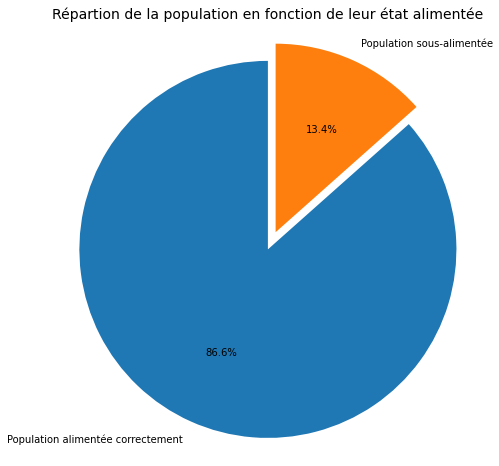

In [126]:
pop_alimentée = pop_totale - pop_sous_alimentée
# Création de la part de la population n'étant pas sous-alimentée

labels = 'Population alimentée correctement', 'Population sous-alimentée'
# Etiquettes des différentes parts de notre graphique

sizes = [pop_alimentée,pop_sous_alimentée]
# Tailles de chaque part de notre graphique

explode = (0.1,0)
# Permet de sortir la part qui nous intérresse du reste du graphique

plt.figure(figsize = (8,8))
# Taille du graphique

plt.pie(sizes, labels=labels, explode = explode,
        autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinis

plt.title('Répartion de la population en fonction de leur état alimentée', fontsize = 14)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.show()
# Montre le graphique

### Nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire mondiale et les apports lipidiques et protéiques en 2017

Pour pouvoir calculer ce nombre théorique, il nous faut d'abords déterminer le nombre de production par jour pour chaque pays en multipliant la population totale d'un pays par l'energie alimentaire par personne disponible par jour.

Pour ce faire, nous aurons donc besoin des tables 'dispo' et 'pop'. Pour la table dispo nous aurons seulement besoin des colonnes 'Pays','Produits' et 'Energie par personne'. Pour la table 'pop', nous aurons besoin des populations enregistrées pour l'année 2017.

In [127]:
pop2 = pop.drop(pop.index[pop_aberrantes])
pop2 = pop[pop.Annee == 2017]
pop2

,Pays,Annee,Population (million)
4,Afghanistan,2017,36.3
10,Afrique du Sud,2017,57.0
16,Albanie,2017,2.9
22,Algerie,2017,41.4
28,Allemagne,2017,82.7
...,...,...,...
1390,Venezuela (Republique bolivarienne du),2017,29.4
1396,Viet Nam,2017,94.6
1402,Yemen,2017,27.8
1408,Zambie,2017,16.9


In [128]:
dispo2 = dispo.loc[:,['Pays',
                      'Produit',
                      'Apport nutritionnel (Kjoule)']]
# Nous allons maintenant fusionner les deux variables nulles et aberrantes ensemble 
dispo_energie_exclue = dispo_energie_aberrantes + dispo_energie_nulle
dispo2 = dispo2.drop(dispo2.index[dispo_energie_exclue])
dispo2

,Pays,Produit,Apport nutritionnel (Kjoule)
0,Afghanistan,Abats Comestible,20.92
1,Afghanistan,"Agrumes, Autres",4.18
2,Afghanistan,Aliments pour enfants,4.18
3,Afghanistan,Ananas,0.00
4,Afghanistan,Bananes,16.74
...,...,...,...
15600,Iles Salomon,Viande de Suides,188.28
15601,Iles Salomon,Viande de Volailles,46.02
15602,Iles Salomon,"Viande, Autre",0.00
15603,Iles Salomon,Vin,0.00


Nous allons à présent fusionner ces deux tables :

In [129]:
production_mondiale = pd.merge(pop2, dispo2)
production_mondiale

,Pays,Annee,Population (million),Produit,Apport nutritionnel (Kjoule)
0,Afghanistan,2017,36.3,Abats Comestible,20.92
1,Afghanistan,2017,36.3,"Agrumes, Autres",4.18
2,Afghanistan,2017,36.3,Aliments pour enfants,4.18
3,Afghanistan,2017,36.3,Ananas,0.00
4,Afghanistan,2017,36.3,Bananes,16.74
...,...,...,...,...,...
12326,Zimbabwe,2017,14.2,Viande de Suides,100.42
12327,Zimbabwe,2017,14.2,Viande de Volailles,71.13
12328,Zimbabwe,2017,14.2,"Viande, Autre",29.29
12329,Zimbabwe,2017,14.2,Vin,4.18


Nous allons à présent multiplier les valeurs qui nous intéressent :

In [130]:
production_mondiale = production_mondiale.assign(Production = production_mondiale['Population (million)']*
                               production_mondiale['Apport nutritionnel (Kjoule)'])
production_mondiale = production_mondiale.rename(columns = {'Production':'Production (million de kjoule)'})
production_mondiale

,Pays,Annee,Population (million),Produit,Apport nutritionnel (Kjoule),Production (million de kjoule)
0,Afghanistan,2017,36.3,Abats Comestible,20.92,759.396
1,Afghanistan,2017,36.3,"Agrumes, Autres",4.18,151.734
2,Afghanistan,2017,36.3,Aliments pour enfants,4.18,151.734
3,Afghanistan,2017,36.3,Ananas,0.00,0.000
4,Afghanistan,2017,36.3,Bananes,16.74,607.662
...,...,...,...,...,...,...
12326,Zimbabwe,2017,14.2,Viande de Suides,100.42,1425.964
12327,Zimbabwe,2017,14.2,Viande de Volailles,71.13,1010.046
12328,Zimbabwe,2017,14.2,"Viande, Autre",29.29,415.918
12329,Zimbabwe,2017,14.2,Vin,4.18,59.356


Maintenant que nous avons la production, nous pouvons calculer la disponibilité mondiale :

In [131]:
disponibilité = production_mondiale['Production (million de kjoule)'].sum()
print('La disponibilité alimentaire mondiale journalière est de', disponibilité,'millions de kjoule.')


La disponibilité alimentaire mondiale journalière est de 71359947.961 millions de kjoule.


Il ne faut pas oublier que ce résultat est exprimé en millions de kjoule par jour.

Nous allons maintenant diviser ce nombre par une estimation de l'apport nutritionnel par individu, qui est d'environ 2000kcal par jour, soit environ 8300 kjoule :

In [132]:
nb_théorique_totale = round(disponibilité/(8300/1000000))
print('Le nombre de personnes pouvant être nourries avec les disponibilités alimentaires est de', 
      nb_théorique_totale,'personnes .')

Le nombre de personnes pouvant être nourri avec les disponibilités alimentaires est de 8597584092 personnes .


Avec la disponibilité alimentaire mondiale, nous pouvons nourir plus de 8,5 milliards de personnes par jour, ce qui est 1 milliard de plus que la population mondiale enregistrée en 2017. 

Seulement, il ne suffit pas d'avoir un bon apport nutritionnel pour bien vivre, il faut également veiller à ce que les apports en certains nutriments soient respectés. Nous allons donc maintenant nous interresser aux apport lipidiques et protéiques.

In [133]:
dispo2 = dispo.loc[:,['Pays',
                      'Produit',
                      'Matière grasse (g)']]
# Nous allons maintenant fusionner les deux variables nulles et aberrantes ensemble 
dispo_graisse_exclue = dispo_graisse_aberrantes + dispo_graisse_nulle
dispo2 = dispo2.drop(dispo2.index[dispo_graisse_exclue])
dispo2

,Pays,Produit,Matière grasse (g)
0,Afghanistan,Abats Comestible,0.20
1,Afghanistan,"Agrumes, Autres",0.01
2,Afghanistan,Aliments pour enfants,0.01
7,Afghanistan,Ble,4.69
10,Afghanistan,Coco (Incl Coprah),0.00
...,...,...,...
15598,Iles Salomon,Viande d'Ovins/Caprins,0.09
15599,Iles Salomon,Viande de Bovins,1.80
15600,Iles Salomon,Viande de Suides,4.28
15601,Iles Salomon,Viande de Volailles,0.69


In [134]:
production_lipide = pd.merge(pop2,dispo2)
production_lipide = production_lipide.assign(Production = production_lipide['Population (million)']*
                               production_lipide['Matière grasse (g)'])
production_lipide = production_lipide.rename(columns = {'Production':'Production (tonne)'})
disponibilité_lipide = production_lipide['Production (tonne)'].sum()
print('La disponibilité alimentaire mondiale journalière de lipides est de', disponibilité_lipide,'tonnes.')

La disponibilité alimentaire mondiale journalière de lipide est de 529808.268 tonnes.


Sachant que l'apport recommandé de lipides par jour pour une personne est de 40% de leur apport nutritionnel :

In [135]:
apport_lipide = 8300 * 0.4 
# Sachant qu'il y a environ 38 kjoule pour 1g de lipide
apport_lipide = round(apport_lipide / 38)
print('Il faut',apport_lipide,'g de lipides par jour pour une personne.')

Il faut 87 g de lipides par jour pour une personne.


In [136]:
nb_théorique_lipide = round(disponibilité_lipide /(apport_lipide/1000000))
print('Le nombre théorique de personne pouvant avoir un bon apport de lipides par jour est de',nb_théorique_lipide)

Le nombre théorique de personne pouvant avoir un bon apport de lipide par jour est de 6089750207


Ce dernier résultat nous montre que seulement 6.1 milliards de personnes dans le monde peuvent théoriquement avoir un bon apport en lipides pour l'année 2017.
Il faudrait donc veiller à ce que la production de certains produits riches en lipide puisse augmenter.

In [137]:
dispo2 = dispo.loc[:,['Pays',
                      'Produit',
                      'Protéines (g)']]
# Nous allons maintenant fusionner les deux variables nulles et aberrantes ensemble 
dispo_protéine_exclue = dispo_protéine_aberrantes + dispo_protéine_nulle
dispo2 = dispo2.drop(dispo2.index[dispo_protéine_exclue])
dispo2

,Pays,Produit,Protéines (g)
0,Afghanistan,Abats Comestible,0.77
1,Afghanistan,"Agrumes, Autres",0.02
2,Afghanistan,Aliments pour enfants,0.03
4,Afghanistan,Bananes,0.05
5,Afghanistan,"Beurre, Ghee",0.03
...,...,...,...
15599,Iles Salomon,Viande de Bovins,2.62
15600,Iles Salomon,Viande de Suides,1.41
15601,Iles Salomon,Viande de Volailles,1.14
15602,Iles Salomon,"Viande, Autre",0.04


In [138]:
production_protéine = pd.merge(pop2,dispo2)
production_protéine = production_protéine.assign(Production = production_protéine['Population (million)']*
                               production_protéine['Protéines (g)'])
production_protéine = production_protéine.rename(columns = {'Production':'Production (tonne)'})
disponibilité_protéine = production_protéine['Production (tonne)'].sum()
print('La disponibilité alimentaire mondiale journalière de protéines est de', disponibilité_protéine,'tonnes.')

La disponibilité alimentaire mondiale journalière de protéines est de 517885.88399999996 tonnes.


Sachant que l'apport protéique recommandé par jour pour une personne est de 15% leur apport nutritionnel :

In [139]:
apport_protéique = 8300 * 0.15 
# Sachant qu'il y a environ 17 kjoule pour 1g de protéine
apport_protéique = round(apport_protéique / 17)
print('Il faut',apport_protéique,'g de protéines par jour pour une personne.')

Il faut 73 g de protéines par jour pour une personne.


In [140]:
nb_théorique_protéine = round(disponibilité_protéine /(apport_protéique/1000000))
print('Le nombre théorique de personne pouvant avoir un bon apport de protéines par jour est de',nb_théorique_protéine)

Le nombre théorique de personne pouvant avoir un bon apport de lipide par jour est de 7094327178


Comme pour l'apport en lipides, la disponibilité mondiale en protéines n'est pas suffisante pour nourrir la population mondiale pour 2017.

Il faudrait donc se concentrer sur la production d'aliments ayant de bons apports protéiques et/ou lipidiques comme la viande, les fruits à coques (noix, amandes, etc), les légumineux (lentilles, pois), les graines et fruits oléagineux ou encore les huiles.

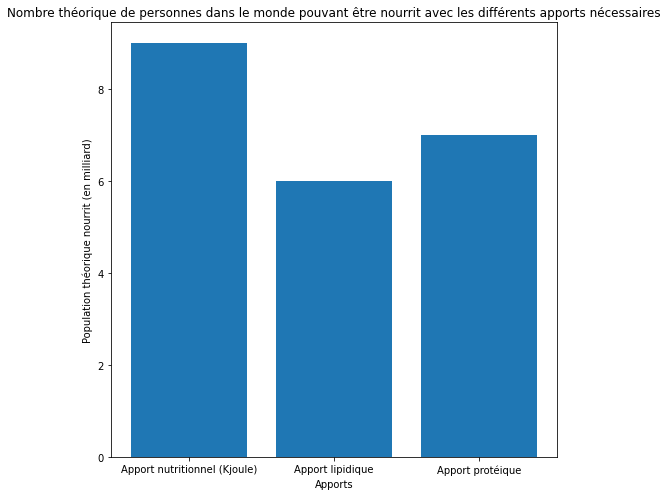

In [141]:
nb_théorique_totale = round(nb_théorique_totale / 10**9)
nb_théorique_lipide = round(nb_théorique_lipide / 10**9)
nb_théorique_protéine = round(nb_théorique_protéine / 10**9)
# Nous allons simplifier les unités et donc nous devons faire la conversion en conséquence

x = np.arange(3)
# Nombre de barres nécessaire

y = [nb_théorique_totale,nb_théorique_lipide,nb_théorique_protéine]
# Valeurs utilisées pour représenter la longueur des barres du diagramme

plt.figure(figsize = (8,8))
# Taille du graphique

plt.bar(x, y) 
# Type de diagramme utilisé

plt.xticks(x, ['Apport nutritionnel (Kjoule)', 'Apport lipidique', 'Apport protéique'])
# Nom des différentes 'barres' du diagramme

plt.xlabel("Apports") 
# Légende de l'axe x

plt.ylabel("Population théorique nourrit (en milliard)")
# Légende de l'axe y

plt.title('Nombre théorique de personnes dans le monde pouvant être nourrit avec les différents apports nécessaires')
# Titre du graphique

plt.show()
# Montre le graphique

### Nombre théorique de personnes pouvant être nourries grâce à la disponibilité alimentaire mondiale des produits végétaux pour l'année 2017

Il s'agit de la même requête que la précédente sauf que cette fois-ci, on veut isoler les produits d'origine végétals.

In [142]:
dispo2 = dispo.loc[:,['Pays',
                      'Produit',
                      'Origine',
                      'Apport nutritionnel (Kjoule)',]]
# Nous allons maintenant fusionner les deux variables nulles et aberrantes ensemble 
dispo_energie_exclue = dispo_energie_aberrantes + dispo_energie_nulle
dispo2 = dispo2.drop(dispo2.index[dispo_energie_exclue])
dispo2

,Pays,Produit,Origine,Apport nutritionnel (Kjoule)
0,Afghanistan,Abats Comestible,animale,20.92
1,Afghanistan,"Agrumes, Autres",vegetale,4.18
2,Afghanistan,Aliments pour enfants,vegetale,4.18
3,Afghanistan,Ananas,vegetale,0.00
4,Afghanistan,Bananes,vegetale,16.74
...,...,...,...,...
15600,Iles Salomon,Viande de Suides,animale,188.28
15601,Iles Salomon,Viande de Volailles,animale,46.02
15602,Iles Salomon,"Viande, Autre",animale,0.00
15603,Iles Salomon,Vin,vegetale,0.00


Puisqu'il n'y a pas de changement à apporter à la table 'pop2', nous pouvons directement passer à la fusion des deux tables :

In [143]:
production = pd.merge(pop2, dispo2)
# Fusion des deux tables

production = production[production.Origine == 'vegetale']
# Exclusion des valeurs autres que vegetale

production

,Pays,Annee,Population (million),Produit,Origine,Apport nutritionnel (Kjoule)
1,Afghanistan,2017,36.3,"Agrumes, Autres",vegetale,4.18
2,Afghanistan,2017,36.3,Aliments pour enfants,vegetale,4.18
3,Afghanistan,2017,36.3,Ananas,vegetale,0.00
4,Afghanistan,2017,36.3,Bananes,vegetale,16.74
6,Afghanistan,2017,36.3,Biere,vegetale,0.00
...,...,...,...,...,...,...
12321,Zimbabwe,2017,14.2,Sesame,vegetale,0.00
12322,Zimbabwe,2017,14.2,The,vegetale,4.18
12323,Zimbabwe,2017,14.2,Tomates,vegetale,4.18
12329,Zimbabwe,2017,14.2,Vin,vegetale,4.18


Nous pouvons maintenant calculer la production des produits alimentaires d'origine végétale par jour :

In [144]:
production = production.assign(Production = production['Population (million)']*
                               production['Apport nutritionnel (Kjoule)'])
production = production.rename(columns = {'Production':'Production (million)'})
production

,Pays,Annee,Population (million),Produit,Origine,Apport nutritionnel (Kjoule),Production (million)
1,Afghanistan,2017,36.3,"Agrumes, Autres",vegetale,4.18,151.734
2,Afghanistan,2017,36.3,Aliments pour enfants,vegetale,4.18,151.734
3,Afghanistan,2017,36.3,Ananas,vegetale,0.00,0.000
4,Afghanistan,2017,36.3,Bananes,vegetale,16.74,607.662
6,Afghanistan,2017,36.3,Biere,vegetale,0.00,0.000
...,...,...,...,...,...,...,...
12321,Zimbabwe,2017,14.2,Sesame,vegetale,0.00,0.000
12322,Zimbabwe,2017,14.2,The,vegetale,4.18,59.356
12323,Zimbabwe,2017,14.2,Tomates,vegetale,4.18,59.356
12329,Zimbabwe,2017,14.2,Vin,vegetale,4.18,59.356


Et finalement calculer la disponibilité alimentaire de ces produits :

In [145]:
disponibilité = production['Production (million)'].sum()
disponibilité

57615665.87100001

Pour obtenir le nombre théorique de personnes pouvant être nourries avec les produits d'origine végétale :

In [146]:
nb_théorique_végétale = round((disponibilité / (8300/10**6)))
print('Le nombre de personnes pouvant être nourries avec les disponibilités alimentaires d\'origine végétale est de', 
      nb_théorique_végétale,
      'personnes .')

Le nombre de personnes pouvant être nourri avec les disponibilités alimentaires d'origine végétale est de 6941646490 personnes .


Ce résultat nous montre que nous pouvons nourrir près de 7 milliards de personnes dans le monde avec les produits d'origine végétales. 

In [147]:
proportion_végétale = round(nb_théorique_végétale / (nb_théorique_totale*10**9) * 100)
print('Le nombre théorique de personnes pouvant être nourries avec des produits d\'origine végétale correspond à',
      proportion_végétale,'% du nombre théorique pouvant être nourri avec tous les types de produits.' )

Le nombre théorique de personnes pouvant être nourrit avec des produits d'origine végétale correspond à 77 % du nombre théorique pouvant être nourrit avec tous les types de produits.


### Utilisation de la disponibilité intérieure

Pour rappel, la disponibilité intérieure est :
- Import + Production + Variation de stock - Export d'une part
- Aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + Traitement d'autre part

Pour l'analyse, nous allons comparer d'une part l'acquisition de la disponibilité intérieure puis nous allons nous interresser à ses utilisations.

Pour cette requête, nous allons créer une liste qui regroupera tous les noms des céréales afin de mieux affiner notre analyse plus tard:

In [148]:
cereales =['Ble','Riz','Orge','Mais','Seigle','Avoine','Millet','Sorgho','Cereales, Autres']
cereales

['Ble',
 'Riz',
 'Orge',
 'Mais',
 'Seigle',
 'Avoine',
 'Millet',
 'Sorgho',
 'Cereales, Autres']

In [149]:
dispo_acquisition = dispo.loc[:,['Pays',
                                 'Produit',
                                 'Disponibilite interieure',
                                'Import',
                                'Production',
                                'Variation de stock',
                                'Export']]
acquisition_exclue = dispo_intérieure_nulle + dispo_interieure_aberrantes
acquisition_exclue = acquisition_exclue + dispo_import_nulle + dispo_import_aberrantes
acquisition_exclue = acquisition_exclue + dispo_production_nulle + dispo_production_aberrantes
acquisition_exclue = acquisition_exclue + dispo_variation_nulle + dispo_variation_aberrantes
acquisition_exclue = acquisition_exclue + dispo_export_nulle + dispo_export_aberrantes
dispo_acquisition = dispo_acquisition.drop(dispo_acquisition.index[acquisition_exclue])
dispo_acquisition

,Pays,Produit,Disponibilite interieure,Import,Production,Variation de stock,Export
77,Afrique du Sud,Citrons & Limes,33.0,2.0,257.0,27.0,253.0
79,Afrique du Sud,Crustaces,22.0,24.0,3.0,0.0,4.0
87,Afrique du Sud,Graines Colza/Moutarde,112.0,2.0,112.0,1.0,3.0
89,Afrique du Sud,Graines de tournesol,590.0,34.0,557.0,0.0,2.0
91,Afrique du Sud,Haricots,105.0,51.0,60.0,0.0,7.0
...,...,...,...,...,...,...,...
15556,Iles Salomon,Huile de Palme,2.0,0.0,37.0,0.0,35.0
15576,Iles Salomon,Palmistes,5.0,0.0,13.0,0.0,8.0
15584,Iles Salomon,"Poissons Marins, Autres",11.0,2.0,10.0,0.0,2.0
15585,Iles Salomon,Poissons Pelagiques,8.0,0.0,25.0,0.0,18.0


In [150]:
imports = dispo_acquisition['Import'].sum()
production = dispo_acquisition['Production'].sum()
variation = dispo_acquisition['Variation de stock'].sum()
exports = dispo_acquisition['Export'].sum()

Nous allons maintenant comparer ces valeurs avec la disponibilité intérieure 

In [151]:
dispo_intérieure = dispo_acquisition['Disponibilite interieure'].sum()

# Part de l'importation 
import_part = round((imports / dispo_intérieure * 100),2)

# Part de la production
prod_part = round((production / dispo_intérieure * 100),2)

# Part de la variation de stock
variation_part = round((variation / dispo_intérieure * 100),2)

#Part de l'exportation
export_part = round((exports / dispo_intérieure * 100),2)

print('L\'importation correspond à',import_part,'% de l\'acquisition de la disponibilité intérieure mondiale')
print('La production correspond à',prod_part,'% de l\'acquisition de la disponibilité intérieure mondiale')
print('La variation des stocks de produits correspond à',variation_part,
      '% de l\'acquisition de la disponibilité intérieure mondiale')
print('L\'exportation correspond à',export_part,'% de la perte de l\'acquisition de la disponibilité intérieure mondiale')

L'importation correspond à 15.05 % de l'acquisition de la disponibilité intérieure mondiale
La production correspond à 104.47 % de l'acquisition de la disponibilité intérieure mondiale
La variation des stocks de produits correspond à -2.31 % de l'acquisition de la disponibilité intérieure mondiale
L'exportation correspond à 17.21 % de la perte de l'acquisition de la disponibilité intérieure mondiale


Au vu de ces résultats, nous comprennons que la production des produits peut théoriquement suffire à l'acquisition de la disponibilité intérieure d'un produit.
Nous allons regarder plus en détail les exportations pour tenter de comprendre pourquoi cela ne suffit pas en pratique à nourrir toute la population en nous concentrant sur les pays exportant le plus.

In [152]:
exportation = dispo.loc[:,['Pays', 'Produit', 'Export', 'Production']]
exportation_exclue = dispo_export_nulle + dispo_export_aberrantes
exportation = exportation.drop(exportation.index[exportation_exclue])
exportation = exportation.sort_values(by = ['Export'],ascending = False)
exportation[:10]
# Affiche les dix premières lignes

,Pays,Produit,Export,Production
15420,Etats-Unis d'Amerique,Soja,39184.0,91389.0
15352,Etats-Unis d'Amerique,Ble,34691.0,57967.0
2161,Bresil,Sucre Eq Brut,27728.0,39494.0
2130,Bresil,Mais,26780.0,80538.0
13809,Thailande,Manioc,25214.0,30228.0
15391,Etats-Unis d'Amerique,Mais,24655.0,353699.0
6323,Indonesie,Huile de Palme,23333.0,26896.0
4851,France,Ble,21502.0,38614.0
2815,Canada,Ble,20704.0,37530.0
895,Australie,Ble,18171.0,22856.0


Nous allons maintenant regarder les populations de ces pays un peu plus en détail :

In [153]:
export_pays = pd.merge(pop, nutrition)
# Puisque nous nous interessons à l'année 2017, nous allons filtrer nos données avec.
export_pays = export_pays[export_pays.Annee == 2017]
#Création d'une liste pour aider à filtrer par pays
pays = ['Etats-Unis d\'Amerique','Bresil','Thailande','Indonesie','France','Canada','Australie']
export_pays[export_pays.Pays.isin(pays)]

,Pays,Annee,Population (million),Population sous-alimentée (million)
70,Australie,2017,24.6,0.0
166,Bresil,2017,207.8,0.0
214,Canada,2017,36.7,0.0
364,Etats-Unis d'Amerique,2017,325.1,0.0
394,France,2017,64.8,0.0
514,Indonesie,2017,264.7,23.6
1114,Thailande,2017,69.2,6.2


Comme nous pouvons le constater, deux des pays exportants des produits voit une partie de sa population être en état de sous- nutrition.

La Thailande exporte plus de 25 000 tonnes de manioc sur les 30 000 qu'elle produit alors que près de 9% de sa population est en état de sous-nutrition.

De même pour l'Indonésie qui exporte plus de 23 000 tonnes d'huile de palme sur les près de 27 000 qu'elle produit.

Nous allons maintenant nous intérresser à l'utilisation de cette disponibilité.

In [154]:
dispo_utilisation = dispo.loc[:,['Pays',
                                 'Produit',
                                 'Disponibilite interieure',
                                 'Aliments pour animaux',
                                 'Autres Utilisations',
                                 'Nourriture',
                                 'Pertes',
                                'Semences',
                                'Traitement']]

utilisation_exclue = dispo_aliments_animaux_nulle + dispo_aliments_animaux_aberrantes 
utilisation_exclue = utilisation_exclue + dispo_autres_nulle + dispo_autres_aberrantes 
utilisation_exclue = utilisation_exclue + dispo_nourriture_nulle + dispo_nourriture_aberrantes 
utilisation_exclue = utilisation_exclue + dispo_pertes_nulle + dispo_pertes_aberrantes
utilisation_exclue = utilisation_exclue + dispo_semences_nulle + dispo_semences_aberrantes 
utilisation_exclue = utilisation_exclue + dispo_traitement_nulle + dispo_traitement_aberrantes
dispo_utilisation = dispo_utilisation.drop(dispo_utilisation.index[utilisation_exclue])
dispo_utilisation

,Pays,Produit,Disponibilite interieure,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
214,Albanie,Orge,19.0,7.0,1.0,1.0,1.0,0.0,9.0
391,Allemagne,Mais,7961.0,6136.0,11.0,1003.0,122.0,63.0,626.0
767,Argentine,"Plantes Oleiferes, Autre",71.0,0.0,0.0,0.0,5.0,1.0,75.0
1085,Azerbaidjan,Ble,3484.0,591.0,264.0,2093.0,71.0,142.0,323.0
1132,Azerbaidjan,Orge,822.0,682.0,1.0,0.0,9.0,73.0,57.0
...,...,...,...,...,...,...,...,...,...
14768,Viet Nam,Riz (Eq Blanchi),21391.0,2712.0,1481.0,13253.0,2703.0,881.0,362.0
14923,Zambie,Mais,2293.0,400.0,19.0,1725.0,76.0,30.0,42.0
15071,Egypte,Ble,19341.0,4860.0,0.0,12048.0,2224.0,217.0,0.0
15109,Egypte,Mais,13802.0,7032.0,282.0,5122.0,1186.0,32.0,148.0


Nous allons maintenant calculer la somme de chaque variable et ainsi réaliser un graphique nous montrant la proportion de chaque utilisation des disponibilités intérieures :

In [155]:
animaux = dispo_utilisation['Aliments pour animaux'].sum()
autres = dispo_utilisation['Autres Utilisations'].sum()
nourriture = dispo_utilisation['Nourriture'].sum()
pertes = dispo_utilisation['Pertes'].sum()
semences = dispo_utilisation['Semences'].sum()
traitement = dispo_utilisation['Traitement'].sum()

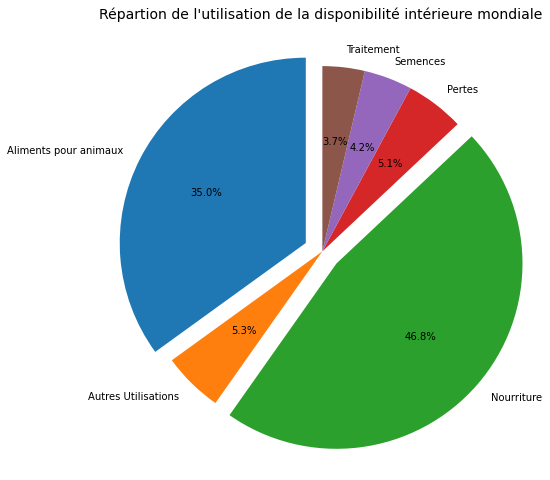

In [156]:
labels = 'Aliments pour animaux', 'Autres Utilisations','Nourriture','Pertes','Semences','Traitement'
# Etiquettes des différentes parts de notre graphique

sizes = [animaux, autres, nourriture, pertes, semences, traitement]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (8,8))
# Taille du graphique

plt.pie(sizes, labels=labels, explode = (0.1,0,0.1,0,0,0),
        autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinis

plt.title('Répartion de l\'utilisation de la disponibilité intérieure mondiale', fontsize = 14, pad=20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.show()
# Montre le graphique

Nous pouvons voir que les parts prédominantes des différentes utilisations des disponibilités intérieures sont l'alimentation humaine et l'alimentation animale.

Nous allons maintenant nous concentrer sur l'utilisation des céréales puisqu'il s'agit de la denrée la plus importante de l'alimentation. 

In [157]:
dispo_utilisation = dispo_utilisation[dispo_utilisation.Produit.isin(cereales)]
dispo_utilisation

,Pays,Produit,Disponibilite interieure,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
214,Albanie,Orge,19.0,7.0,1.0,1.0,1.0,0.0,9.0
391,Allemagne,Mais,7961.0,6136.0,11.0,1003.0,122.0,63.0,626.0
1085,Azerbaidjan,Ble,3484.0,591.0,264.0,2093.0,71.0,142.0,323.0
1132,Azerbaidjan,Orge,822.0,682.0,1.0,0.0,9.0,73.0,57.0
2186,Bulgarie,Ble,2104.0,267.0,23.0,875.0,608.0,238.0,93.0
...,...,...,...,...,...,...,...,...,...
14479,Uruguay,Mais,373.0,210.0,8.0,91.0,41.0,4.0,19.0
14656,Venezuela (Republique bolivarienne du),Mais,3872.0,2042.0,1.0,1680.0,97.0,2.0,51.0
14923,Zambie,Mais,2293.0,400.0,19.0,1725.0,76.0,30.0,42.0
15071,Egypte,Ble,19341.0,4860.0,0.0,12048.0,2224.0,217.0,0.0


In [158]:
animaux = dispo_utilisation['Aliments pour animaux'].sum()
autres = dispo_utilisation['Autres Utilisations'].sum()
nourriture = dispo_utilisation['Nourriture'].sum()
pertes = dispo_utilisation['Pertes'].sum()
semences = dispo_utilisation['Semences'].sum()
traitement = dispo_utilisation['Traitement'].sum()

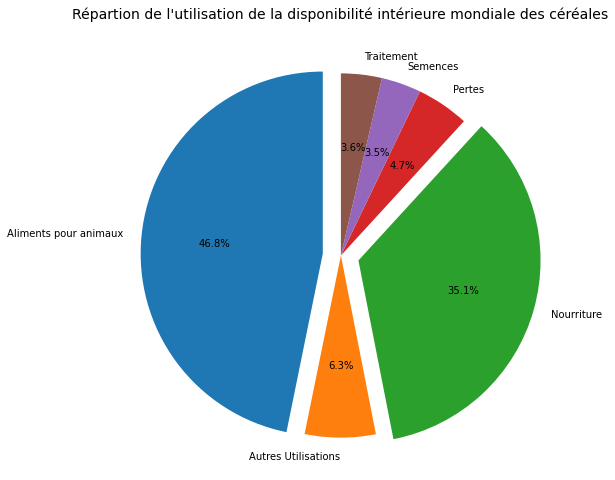

In [159]:
labels = 'Aliments pour animaux', 'Autres Utilisations','Nourriture','Pertes','Semences','Traitement'
# Etiquettes des différentes parts de notre graphique

sizes = [animaux, autres, nourriture, pertes, semences, traitement]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (8,8))
# Taille du graphique

plt.pie(sizes, labels=labels, explode = (0.1,0,0.1,0,0,0),
        autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinis

plt.title('Répartion de l\'utilisation de la disponibilité intérieure mondiale des céréales', fontsize = 14, pad=20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.show()
# Montre le graphique

Quand nous comparons l'utilisation des disponibilités intérieures des céréales et l'utilisation des disponibilités intérieures de tous les produits confondus, nous pouvons constater qu'il y a une grande part de céréales qui est utilisée dans l'alimentation animale. 

Nous pouvons également observer qu'environ 5% des disponibilités intérieures sont perdues, que soit tous les produits confondus ou juste les céréales.

Nous pouvons maintenant passer à la seconde partie des analyses demandées.

## Analyses pour Mélanie

Pour rappel, Mélanie demande :
- Les pays ayant les plus fortes proportions de personnes sous-alimentées en 2017
- Les pays ayant reçu le plus d'aide depuis 2013
- Les pays ayant le plus de disponibilité alimentaire par habitant
- Les pays ayant le moins de disponibilité alimentaire par habitant

### Pays ayant les plus fortes proportions de personnes sous-alimentées en 2017

Pour cette analyse, nous allons réutiliser la table 'pop_nutrition_2017' :

In [160]:
pop_nutrition_2017

# Création d'une colonne pour regrouper les proportions de personnes en état de sous-nutrition par pays
pop_nutrition_2017 = pop_nutrition_2017.assign(Proportion = pop_nutrition_2017['Population sous-alimentée (million)']/
                               pop_nutrition_2017['Population (million)'])
pop_nutrition_2017_trié = pop_nutrition_2017.sort_values(by = ['Proportion'],ascending = False)
pop_nutrition_2017_trié[:10]
# Affiche les dix premières lignes donc dans notre cas les dix pays ayant la plus forte proportion de population sous-alimentée

,Pays,Annee,Population (million),Population sous-alimentée (million),Proportion
195,Haiti,2017,11.0,5.3,0.481818
378,Republique populaire democratique de Coree,2017,25.4,12.0,0.472441
258,Madagascar,2017,25.6,10.5,0.410156
246,Liberia,2017,4.7,1.8,0.382979
234,Lesotho,2017,2.1,0.8,0.380952
445,Tchad,2017,15.0,5.7,0.380000
384,Rwanda,2017,12.0,4.2,0.350000
451,Timor-Leste,2017,1.2,0.4,0.333333
306,Mozambique,2017,28.6,9.4,0.328671
486,Venezuela (Republique bolivarienne du),2017,29.4,8.0,0.272109


Nous pouvons rapidement nous rendre compte que sept des pays listés ci-dessus font parti du continent africain.

### Pays ayant reçu le plus d'aide depuis 2013

Pour cette analyse, nous avons uniquement besoin de la table 'aide' puisqu'elle regroupe déjà le nom des pays ainsi que l'aide reçue.

In [161]:
aide_2013 = aide[aide.Annee >= 2013]
aide_2013 = aide_2013.drop(aide_2013.index[aide_aberrantes])
aide_2013 = aide_2013['Pays beneficiaire'].value_counts()
aide_2013[:10]

Algerie                      39
Burkina Faso                 29
Djibouti                     29
Nicaragua                    29
Haiti                        28
Mauritanie                   28
Sri Lanka                    27
Cameroun                     26
Republique centrafricaine    25
Guinee                       24
Name: Pays beneficiaire, dtype: int64

Nous constatons que sept pays ayant reçu de l'aide se situent en Afrique.
Nous constatons également que Haïti a reçu 28 aides alimentaires depuis 2013 mais malgré tout reste le pays avec la plus forte proportion de personnes en état de sous-nutrition.

### Pays ayant le plus de disponibilité alimentaire par habitant

Pour les deux prochaines requêtes, nous aurons besoin uniquement de la table 'dispo'.

In [162]:
dispo_exclue = dispo_quantité_nulle + dispo_quantité_aberrantes
dispo2 = dispo.loc[:,['Pays','Disponibilite alimentaire (g)']]
dispo2 = dispo2.drop(dispo2.index[dispo_exclue])
dispo2 = dispo2.groupby('Pays').sum()
dispo2 

,Disponibilite alimentaire (g)
Pays,
Afghanistan,521.35
Afrique du Sud,1375.48
Albanie,2240.94
Algerie,1281.36
Allemagne,2331.56
...,...
Venezuela (Republique bolivarienne du),1788.64
Viet Nam,1574.85
Yemen,1028.56


In [171]:
dispo_trié = dispo2.sort_values(by = ['Disponibilite alimentaire (g)'],ascending = False)
dispo_trié[:10]
# Affiche les dix premières lignes 

,Disponibilite alimentaire (g)
Pays,
Luxembourg,3115.88
Finlande,2859.56
Etats-Unis d'Amerique,2746.29
Roumanie,2730.43
Grece,2681.23
Dominique,2671.71
Turquie,2652.45
Autriche,2652.32
Suede,2634.96


Nous pouvons constater que la majorité des pays ayant le plus de disponibilité alimentaire sont des pays d'Europe.

### Pays ayant le moins de disponibilité alimentaire par habitant

Pour cette analyse, nous reprenons la même table que pour la précédente et nous allons afficher cette fois avec un ordre croissant pour avoir les 10 pays avec le moins de disponibilité alimentaire par habitant.

In [172]:
dispo_trié = dispo2.sort_values(by = ['Disponibilite alimentaire (g)'])
dispo_trié[:10]
# Affiche les dix premières lignes 

,Disponibilite alimentaire (g)
Pays,
Afghanistan,521.35
Lesotho,678.53
Liberia,743.21
Timor-Leste,778.53
Tchad,787.97
Bangladesh,816.94
Senegal,850.52
Republique centrafricaine,858.10
Haiti,899.25


Nous avons sept pays d'Afrique sur les dix pays affichés qui possèdent la plus faible disponibilité alimentaire par habitant.

# Conclusion

Grâce aux analyses demandées, nous sommes en mesure de conclure que :
- Avec la disponibilité alimentaire mondiale, nous sommes en mesure de nourrir toute la population mondiale
- Nous pouvons actuellement fournir suffisament de lipides et de protéines à une grande partie de la population mondiale, mais pas à la totalité
- Les pays nécessitant le plus d'aide sont situés en Afrique puisqu'ils possèdent le moins de ressources alimentaires par habitants
- Certains pays exportent une grande quantité de produits alors qu'une partie leur population souffre de mal-nutrition

Je suggère, afin d'atteindre notre objectif de se débarrasser de la faim dans le monde, d'essayer de convaincre les gouvernements des pays en difficulté d'exporter leurs produits après avoir calculer la part nécessaire pour alimenter toute sa population.
Je suggère également d'augmenter la production de certains produits contenant les nutriments nécéssaires pour assurer la bonne santé de chacun comme les légumineux ou encore les pois en favorisant ceux qui sont faciles et moins cher à produire tout en assurant un bon apport en nutriments.